# Import and set colors

In [1]:
import scanpy as sc
import anndata as ann
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import cm, colors
from gprofiler import gprofiler

import os 

#pretty plotting
import seaborn as sb


In [2]:
import batchglm.api as glm
import diffxpy.api as de

print("batchglm version "+glm.__version__)
print("diffpy version "+de.__version__)
from batchglm.pkg_constants import TF_CONFIG_PROTO

batchglm version v0.7.4
diffpy version v0.7.4


In [3]:
#Set number of threads
TF_CONFIG_PROTO.inter_op_parallelism_threads = 1
TF_CONFIG_PROTO.intra_op_parallelism_threads = 12

In [4]:
plt.rcParams['figure.figsize']=(4,4) #rescale figures
sc.settings.verbosity = 3
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=300,transparent=False, fontsize=12, color_map='plasma')
sc.logging.print_header()

scanpy==1.7.1 anndata==0.7.6 umap==0.5.1 numpy==1.21.2 scipy==1.8.1 pandas==1.2.3 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3 pynndescent==0.5.4


In [5]:
#Define a nice colour map for gene expression
colors2 = plt.cm.plasma(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap2 = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

# Set project file paths

In [6]:
file_path = '/Volumes/Seagate_Exp/Paper_sc_analysis/' 
#this is my file path please adapt it to your directory

In [7]:
data_dir = '/Volumes/Seagate_Exp/Paper_sc_analysis/notebooks/analysis_early_time_points/040522_corrected_notebooks/data_scVI/' 

In [8]:
table_dir = file_path + 'tables_earlytp/'

In [9]:
sc.settings.figdir = file_path + 'figures_earlytp/'

In [10]:
import datetime

today = datetime.date.today().strftime('%y%m%d') #creates a YYMMDD string of today's date

# Read Data & downstream analysis

In [11]:
adata_all_astros=sc.read(data_dir + "220718adata_treated_astros_proc_cl_figure.h5ad")

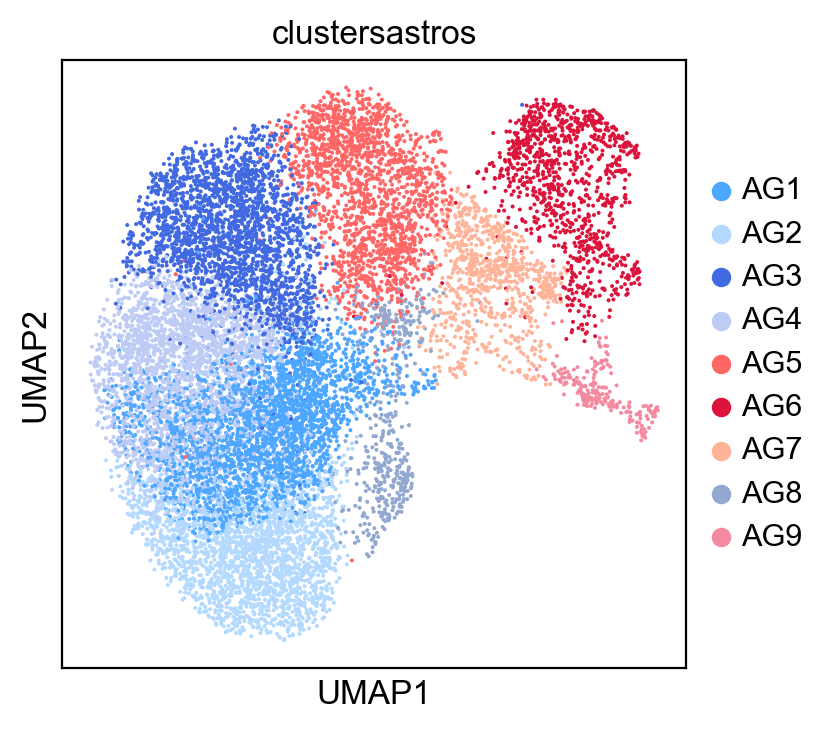

In [12]:
sc.pl.umap(adata_all_astros, color='clustersastros')

In [13]:
adata_all_astros_3dpi= adata_all_astros[np.in1d(adata_all_astros.obs['condition'], 
                           ['3dpi_V','3dpi_I'])].copy()

# 3dpi DEG after treatment

In [14]:
adata_all_astros_3dpi.obs['clustersastros'].value_counts()*0.1

AG1    62.2
AG6    34.1
AG5    24.2
AG2    23.6
AG4    22.8
AG7    16.8
AG9    13.8
AG3    10.9
AG8    10.0
Name: clustersastros, dtype: float64

In [15]:
adata_all_astros_3dpi_AG7= adata_all_astros_3dpi[np.in1d(adata_all_astros_3dpi.obs['clustersastros'], 
                           ['AG7'])].copy()

In [16]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_all_astros_3dpi_AG7.n_vars))

# Min 10% cells 
sc.pp.filter_genes(adata_all_astros_3dpi_AG7, min_cells=17)
print('Number of genes after cell filter: {:d}'.format(adata_all_astros_3dpi_AG7.n_vars))

Total number of genes: 15539
filtered out 5755 genes that are detected in less than 17 cells
Number of genes after cell filter: 9784


In [17]:
adata_all_astros_3dpi_AG7.layers['counts'].todense()

matrix([[4., 0., 3., ..., 1., 3., 0.],
        [2., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 1., 0.],
        ...,
        [6., 0., 5., ..., 1., 1., 3.],
        [2., 2., 2., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [18]:
adata_all_astros_3dpi_AG8= adata_all_astros_3dpi[np.in1d(adata_all_astros_3dpi.obs['clustersastros'], 
                           ['AG8'])].copy()

In [19]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_all_astros_3dpi_AG8.n_vars))

# Min 10% cells
sc.pp.filter_genes(adata_all_astros_3dpi_AG8, min_cells=10)
print('Number of genes after cell filter: {:d}'.format(adata_all_astros_3dpi_AG8.n_vars))

Total number of genes: 15539
filtered out 10515 genes that are detected in less than 10 cells
Number of genes after cell filter: 5024


In [20]:
adata_all_astros_3dpi_AG9= adata_all_astros_3dpi[np.in1d(adata_all_astros_3dpi.obs['clustersastros'], 
                           ['AG9'])].copy()

In [21]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_all_astros_3dpi_AG9.n_vars))

# Min 10% cells
sc.pp.filter_genes(adata_all_astros_3dpi_AG9, min_cells=14)
print('Number of genes after cell filter: {:d}'.format(adata_all_astros_3dpi_AG9.n_vars))

Total number of genes: 15539
filtered out 8137 genes that are detected in less than 14 cells
Number of genes after cell filter: 7402


In [22]:
adata_all_astros_3dpi_AG9.obs['condition'].value_counts()

3dpi_V    81
3dpi_I    57
Name: condition, dtype: int64

In [23]:
adata_all_astros_3dpi_AG6= adata_all_astros_3dpi[np.in1d(adata_all_astros_3dpi.obs['clustersastros'], 
                           ['AG6'])].copy()

In [24]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_all_astros_3dpi_AG6.n_vars))

# Min 10% cells
sc.pp.filter_genes(adata_all_astros_3dpi_AG6, min_cells=35)
print('Number of genes after cell filter: {:d}'.format(adata_all_astros_3dpi_AG6.n_vars))

Total number of genes: 15539
filtered out 11250 genes that are detected in less than 35 cells
Number of genes after cell filter: 4289


In [25]:
adata_all_astros_3dpi_AG5= adata_all_astros_3dpi[np.in1d(adata_all_astros_3dpi.obs['clustersastros'], 
                           ['AG5'])].copy()

In [26]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_all_astros_3dpi_AG5.n_vars))

# Min 10% cells
sc.pp.filter_genes(adata_all_astros_3dpi_AG5, min_cells=25)
print('Number of genes after cell filter: {:d}'.format(adata_all_astros_3dpi_AG5.n_vars))

Total number of genes: 15539
filtered out 7374 genes that are detected in less than 25 cells
Number of genes after cell filter: 8165


In [27]:
adata_all_astros_3dpi_AG1= adata_all_astros_3dpi[np.in1d(adata_all_astros_3dpi.obs['clustersastros'], 
                           ['AG1'])].copy()

In [28]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_all_astros_3dpi_AG1.n_vars))

# Min 10% cells
sc.pp.filter_genes(adata_all_astros_3dpi_AG1, min_cells=63)
print('Number of genes after cell filter: {:d}'.format(adata_all_astros_3dpi_AG1.n_vars))

Total number of genes: 15539
filtered out 10423 genes that are detected in less than 63 cells
Number of genes after cell filter: 5116


In [29]:
adata_all_astros_3dpi_AG2= adata_all_astros_3dpi[np.in1d(adata_all_astros_3dpi.obs['clustersastros'], 
                           ['AG2'])].copy()

In [30]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_all_astros_3dpi_AG2.n_vars))

# Min 10% cells
sc.pp.filter_genes(adata_all_astros_3dpi_AG2, min_cells=24)
print('Number of genes after cell filter: {:d}'.format(adata_all_astros_3dpi_AG2.n_vars))

Total number of genes: 15539
filtered out 11014 genes that are detected in less than 24 cells
Number of genes after cell filter: 4525


In [31]:
adata_all_astros_3dpi_AG3= adata_all_astros_3dpi[np.in1d(adata_all_astros_3dpi.obs['clustersastros'], 
                           ['AG3'])].copy()

In [32]:
###### Filter genes:
print('Total number of genes: {:d}'.format(adata_all_astros_3dpi_AG3.n_vars))

# Min 10% cells
sc.pp.filter_genes(adata_all_astros_3dpi_AG3, min_cells=22)
print('Number of genes after cell filter: {:d}'.format(adata_all_astros_3dpi_AG3.n_vars))

Total number of genes: 15539
filtered out 12413 genes that are detected in less than 22 cells
Number of genes after cell filter: 3126


In [33]:
adata_all_astros_3dpi_AG4= adata_all_astros_3dpi[np.in1d(adata_all_astros_3dpi.obs['clustersastros'], 
                           ['AG4'])].copy()

In [34]:
###### Filter genes:
print('Total number of genes: {:d}'.format(adata_all_astros_3dpi_AG4.n_vars))

# Min 10% cells
sc.pp.filter_genes(adata_all_astros_3dpi_AG4, min_cells=23)
print('Number of genes after cell filter: {:d}'.format(adata_all_astros_3dpi_AG4.n_vars))

Total number of genes: 15539
filtered out 9859 genes that are detected in less than 23 cells
Number of genes after cell filter: 5680


# Cluster 0

In [35]:
difxpy_reactiveastros_3dpi_VvsI_AG1= de.test.wald(
    data=adata_all_astros_3dpi_AG1.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_astros_3dpi_AG1.var_names,
    sample_description=adata_all_astros_3dpi_AG1.obs
)

training location model: False
training scale model: True
iter   0: ll=18911562.754491
iter   1: ll=18911562.754491, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=2646244.158663, converged: 0.66% (loc: 0.66%, scale update: True), in 10.58sec
iter   3: ll=2646244.158663, converged: 0.66% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=2575081.928365, converged: 92.73% (loc: 92.73%, scale update: True), in 9.88sec
iter   5: ll=2575081.928365, converged: 92.73% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=2565991.033381, converged: 98.44% (loc: 98.44%, scale update: True), in 4.43sec
iter   7: ll=2565991.033381, converged: 98.44% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=2565060.576419, converged: 99.78% (loc: 99.78%, scale update: True), in 4.63sec
iter   9: ll=2565060.576419, converged: 99.78% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=2565042.514165, converged: 99.98% (loc: 99.98%, scale u

/opt/anaconda3/envs/sc-tutorial-020321/lib/python3.8/site-packages/dask/array/core.py:2894: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


Order test results by q-value:

In [36]:
difxpy_reactiveastros_3dpi_VvsI_AG1.summary().sort_values('qval', ascending=True).iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
1007,S100a6,1.332268e-15,6.815881e-12,-0.976128,2.101286,False,3.043915e-10,-0.976128,0.122257,-1173.875925
820,Rps4x,3.057554e-13,7.821224e-10,-0.680385,2.993569,False,2.118525e-10,-0.680385,0.093308,-1370.261861
2426,Cd81,7.727152e-13,1.317737e-09,-0.399749,18.278135,False,3.179121e-09,-0.399749,0.055785,-2322.506352
1867,Ptn,4.464873e-12,5.710572e-09,-0.405181,18.654341,False,3.290096e-09,-0.405181,0.058538,-2353.472570
2361,Nupr1,7.818635e-12,8.000027e-09,-1.028400,1.644695,False,3.216196e-09,-1.028400,0.150311,-1026.577741
2531,Chchd10,1.746536e-11,1.489213e-08,-0.433107,5.737942,False,2.524890e-08,-0.433107,0.064395,-1670.381200
2041,Cd9,2.043210e-11,1.493295e-08,-0.686555,3.668810,False,1.558640e-08,-0.686555,0.102426,-1485.702519
2741,Scrg1,2.773937e-11,1.773932e-08,-0.505910,3.302251,False,4.463450e-10,-0.505910,0.075984,-1395.800657
3141,Hspa8,4.813749e-11,2.736349e-08,-0.443028,6.414791,False,4.042991e-08,-0.443028,0.067364,-1753.739073
754,Rpl39,5.580114e-11,2.854786e-08,-0.590739,2.636656,False,3.344152e-08,-0.590739,0.090126,-1301.478468


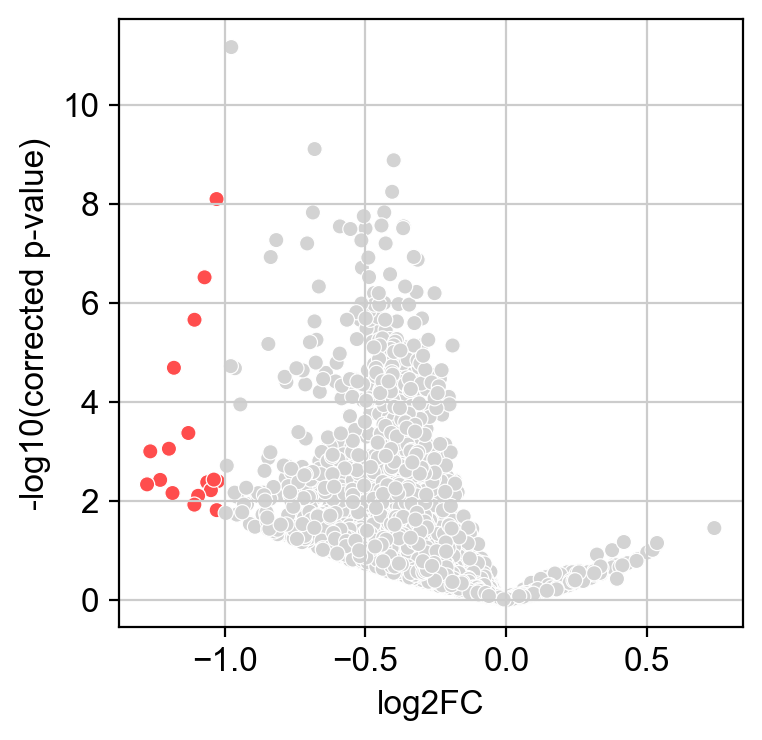

In [37]:
difxpy_reactiveastros_3dpi_VvsI_AG1.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [38]:
difxpy_reactiveastros_3dpi_VvsI_AG1.summary().to_csv(table_dir+today + 'difxpy_reactiveastros_3dpi_VvsI_AG1.csv')

In [39]:
difxpy_3dpi_VvsI_AG1 = pd.read_csv(table_dir + '220718difxpy_reactiveastros_3dpi_VvsI_AG1.csv', index_col=0)

In [40]:
difxpy_3dpi_VvsI_expressed_AG1=difxpy_3dpi_VvsI_AG1.loc[difxpy_3dpi_VvsI_AG1['mean']>0.2]

In [41]:
difxpy_3dpi_VvsI_expressed_signif_AG1 = difxpy_3dpi_VvsI_expressed_AG1.loc[difxpy_3dpi_VvsI_expressed_AG1['pval']<0.05]

In [42]:
Astros_3dpi_Vehicle_AG1 = difxpy_3dpi_VvsI_expressed_signif_AG1.loc[difxpy_3dpi_VvsI_expressed_signif_AG1['log2fc']>0.7]
Astros_3dpi_Inhibitors_AG1 = difxpy_3dpi_VvsI_expressed_signif_AG1.loc[difxpy_3dpi_VvsI_expressed_signif_AG1['log2fc']<-0.7]

In [43]:
Astros_3dpi_Vehicle_AG1.shape

(0, 10)

In [44]:
Astros_3dpi_Inhibitors_AG1.shape

(44, 10)

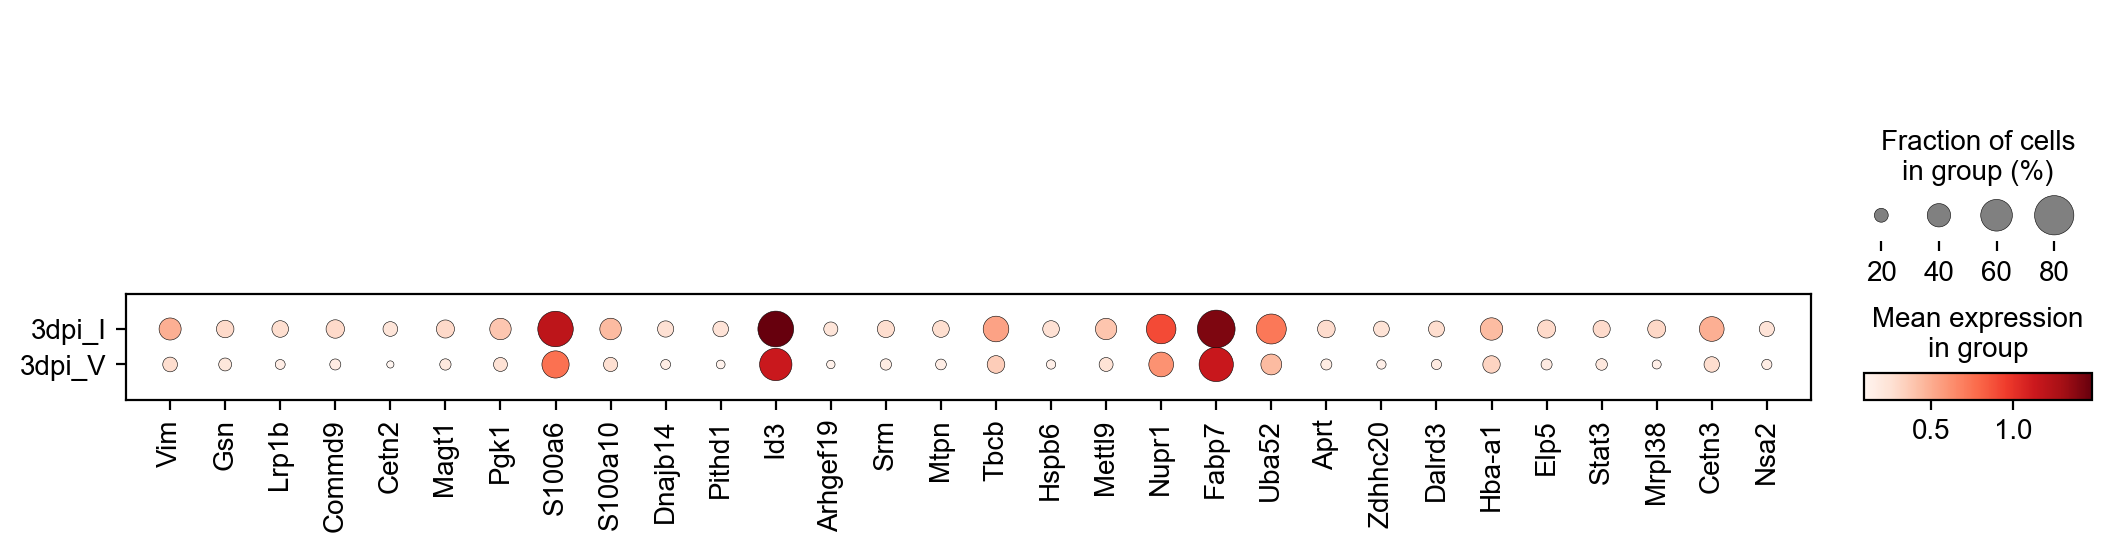

In [45]:
sc.pl.dotplot(adata_all_astros_3dpi_AG1,Astros_3dpi_Inhibitors_AG1['gene'].head(30) , groupby='condition',)

# Cluster AG2

In [46]:
difxpy_reactiveastros_3dpi_VvsI_AG2= de.test.wald(
    data=adata_all_astros_3dpi_AG2.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_astros_3dpi_AG2.var_names,
    sample_description=adata_all_astros_3dpi_AG2.obs
)

training location model: False
training scale model: True
iter   0: ll=12996387.375211
iter   1: ll=12996387.375211, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=794478.405672, converged: 0.40% (loc: 0.40%, scale update: True), in 8.06sec
iter   3: ll=794478.405672, converged: 0.40% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=733535.398321, converged: 87.38% (loc: 87.38%, scale update: True), in 7.64sec
iter   5: ll=733535.398321, converged: 87.38% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=726840.056216, converged: 97.37% (loc: 97.37%, scale update: True), in 4.59sec
iter   7: ll=726840.056216, converged: 97.37% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=726109.226929, converged: 99.47% (loc: 99.47%, scale update: True), in 3.99sec
iter   9: ll=726109.226929, converged: 99.47% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=725935.533947, converged: 99.91% (loc: 99.91%, scale update: Tru

/opt/anaconda3/envs/sc-tutorial-020321/lib/python3.8/site-packages/dask/array/core.py:2894: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


Order test results by q-value:

In [47]:
difxpy_reactiveastros_3dpi_VvsI_AG2.summary().sort_values('qval', ascending=True).iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
3965,Zbtb20,3.460771e-07,0.001566,-0.666896,1.911017,False,2.394885e-09,-0.666896,0.130855,-411.372695
1463,Dynll1,3.493716e-06,0.003952,-0.575067,2.347458,False,1.403477e-08,-0.575067,0.123952,-457.422494
1776,Cd9,2.548929e-06,0.003952,-0.929934,1.063559,False,1.637368e-10,-0.929934,0.197683,-326.015275
717,Rps4x,2.985057e-06,0.003952,-0.691414,1.741525,False,1.622397e-09,-0.691414,0.147996,-408.060919
2338,Atp5b,2.090269e-05,0.016422,-0.463301,2.949153,False,7.160318e-09,-0.463301,0.108883,-493.687395
762,Tmsb4x,2.540463e-05,0.016422,-0.516212,2.771186,False,4.800534e-10,-0.516212,0.122581,-492.622800
4386,Malat1,2.525351e-05,0.016422,-0.250675,593.080508,False,1.689365e-07,-0.250675,0.059507,-1630.965154
2131,Cd81,5.592014e-05,0.018006,-0.374984,6.347458,False,4.416179e-08,-0.374984,0.093062,-644.699244
3755,Cyc1,8.861960e-05,0.018006,-0.625113,1.156780,False,5.259236e-09,-0.625113,0.159475,-337.111166
231,Atp1a2,4.002095e-05,0.018006,-0.257372,18.283898,False,8.908419e-10,-0.257372,0.062661,-820.194299


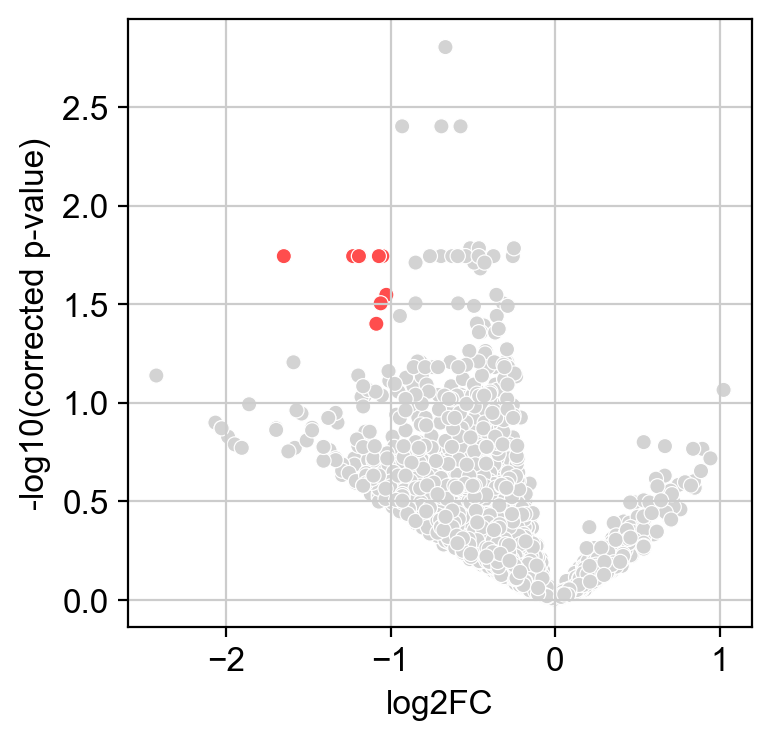

In [48]:
difxpy_reactiveastros_3dpi_VvsI_AG2.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [49]:
difxpy_reactiveastros_3dpi_VvsI_AG2.summary().to_csv(table_dir+today + 'difxpy_reactiveastros_3dpi_VvsI_AG2.csv')

In [50]:
difxpy_3dpi_VvsI_AG2 = pd.read_csv(table_dir + '220718difxpy_reactiveastros_3dpi_VvsI_AG2.csv', index_col=0)

In [51]:
difxpy_3dpi_VvsI_expressed_AG2=difxpy_3dpi_VvsI_AG2.loc[difxpy_3dpi_VvsI_AG2['mean']>0.2]

In [52]:
difxpy_3dpi_VvsI_expressed_AG2

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,Mrpl15,0.816458,0.934588,-0.075066,0.313559,False,2.460387e-10,-0.075066,0.323418,-167.854007
2,Tcea1,0.661642,0.871849,-0.126938,0.224576,False,1.961577e-01,-0.126938,0.290047,-79.411584
3,Rgs20,0.137961,0.474733,-0.299003,0.588983,False,1.217708e-10,-0.299003,0.201562,-243.659785
4,Atp6v1h,0.848489,0.948874,-0.062736,0.203390,False,5.913645e-10,-0.062736,0.328378,-129.002844
5,Rb1cc1,0.148175,0.487685,-0.412938,0.258475,False,4.466014e-01,-0.412938,0.285571,-12.133949
...,...,...,...,...,...,...,...,...,...,...
4520,mt-Nd4l,0.000929,0.065856,-0.711805,0.932203,False,8.209881e-09,-0.711805,0.214970,-309.849025
4521,mt-Nd4,0.000900,0.065856,-0.307917,18.033898,False,1.445983e-09,-0.307917,0.092748,-887.651885
4522,mt-Nd5,0.000931,0.065856,-0.588666,2.025424,False,5.054149e-09,-0.588666,0.177821,-446.993637
4523,mt-Cytb,0.008536,0.164976,-0.230084,31.944915,False,1.252106e-07,-0.230084,0.087481,-1013.927184


In [53]:
difxpy_3dpi_VvsI_expressed_signif_AG2 = difxpy_3dpi_VvsI_expressed_AG2.loc[difxpy_3dpi_VvsI_expressed_AG2['pval']<0.05]

In [54]:
Astros_3dpi_Vehicle_AG2 = difxpy_3dpi_VvsI_expressed_signif_AG2.loc[difxpy_3dpi_VvsI_expressed_signif_AG2['log2fc']>0.7]
Astros_3dpi_Inhibitors_AG2 = difxpy_3dpi_VvsI_expressed_signif_AG2.loc[difxpy_3dpi_VvsI_expressed_signif_AG2['log2fc']<-0.7]

In [55]:
Astros_3dpi_Vehicle_AG2.shape

(0, 10)

In [56]:
Astros_3dpi_Inhibitors_AG2.shape

(134, 10)

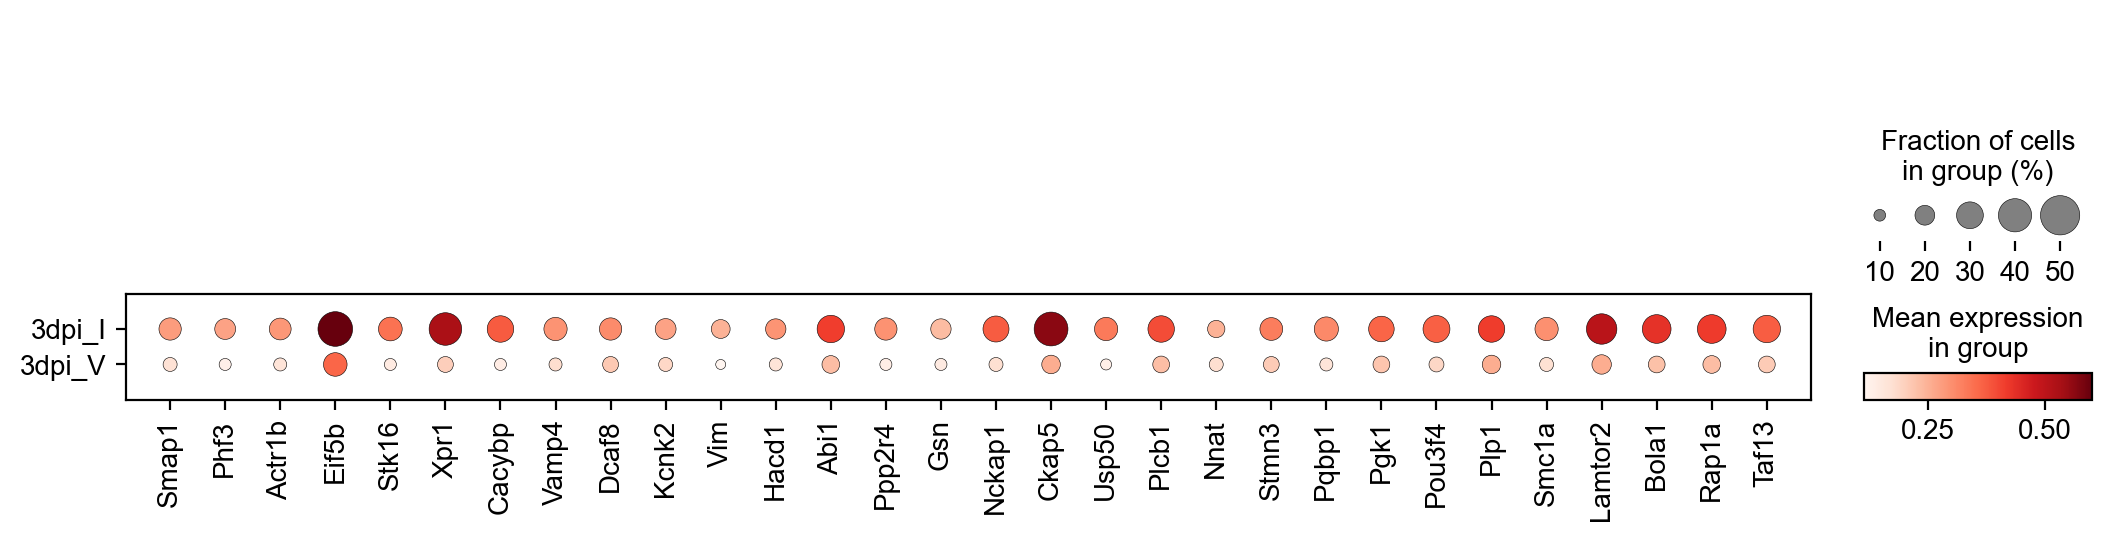

In [57]:
sc.pl.dotplot(adata_all_astros_3dpi_AG2,Astros_3dpi_Inhibitors_AG2['gene'].head(30) , groupby='condition',)

# Cluster AG3

In [58]:
difxpy_reactiveastros_3dpi_VvsI_AG3= de.test.wald(
    data=adata_all_astros_3dpi_AG3.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_astros_3dpi_AG3.var_names,
    sample_description=adata_all_astros_3dpi_AG3.obs
)

training location model: False
training scale model: True
iter   0: ll=8272921.992926
iter   1: ll=8272921.992926, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=416840.724519, converged: 0.19% (loc: 0.19%, scale update: True), in 5.96sec
iter   3: ll=416840.724519, converged: 0.19% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=350765.150278, converged: 84.71% (loc: 84.71%, scale update: True), in 5.97sec
iter   5: ll=350765.150278, converged: 84.71% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=346477.874935, converged: 95.97% (loc: 95.97%, scale update: True), in 4.10sec
iter   7: ll=346477.874935, converged: 95.97% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=345689.225581, converged: 99.39% (loc: 99.39%, scale update: True), in 3.74sec
iter   9: ll=345689.225581, converged: 99.39% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=345520.164033, converged: 99.87% (loc: 99.87%, scale update: True)

/opt/anaconda3/envs/sc-tutorial-020321/lib/python3.8/site-packages/dask/array/core.py:2894: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


Order test results by q-value:

In [59]:
difxpy_reactiveastros_3dpi_VvsI_AG3.summary().sort_values('qval', ascending=True).iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
987,Slc4a4,0.000084,0.157915,-0.654014,2.412844,False,6.442856e-09,-0.654014,0.166335,-211.884298
1370,Rlbp1,0.000101,0.157915,1.332451,0.715596,False,5.275902e-09,1.332451,0.342700,-118.982220
1108,Ndufa5,0.000341,0.279484,0.660506,1.825688,False,3.384388e-10,0.660506,0.184379,-188.554647
3090,Pgam1,0.000358,0.279484,0.588011,1.981651,False,1.934548e-09,0.588011,0.164731,-191.858021
526,Car2,0.001009,0.300734,0.517943,4.954128,False,3.274654e-08,0.517943,0.157523,-281.685300
1800,Adk,0.000973,0.300734,0.616831,1.990826,False,7.949285e-09,0.616831,0.187013,-198.524056
570,Rps3a1,0.001261,0.300734,0.529238,2.110092,False,6.202473e-09,0.529238,0.164124,-197.650639
2872,Gm42418,0.000896,0.300734,1.123906,1.577982,False,2.870329e-08,1.123906,0.338380,-173.494907
2833,Mtch1,0.000650,0.300734,1.035200,0.605505,False,1.206835e-09,1.035200,0.303605,-107.159243
797,Urod,0.001347,0.300734,1.281158,0.422018,False,2.188963e-09,1.281158,0.399637,-87.926739


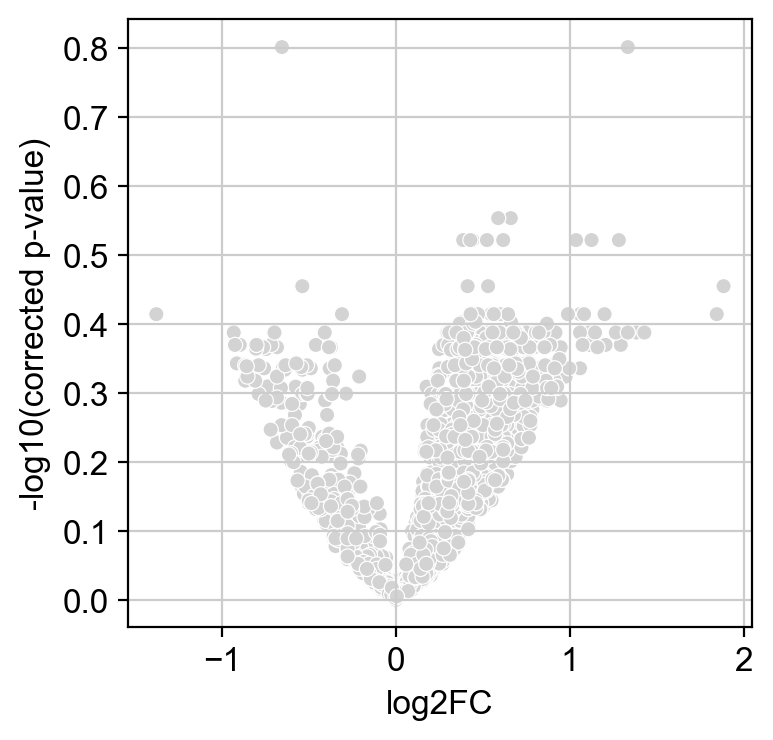

In [60]:
difxpy_reactiveastros_3dpi_VvsI_AG3.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [61]:
difxpy_reactiveastros_3dpi_VvsI_AG3.summary().to_csv(table_dir+today + 'difxpy_reactiveastros_3dpi_VvsI_AG3.csv')

In [62]:
difxpy_3dpi_VvsI_AG3 = pd.read_csv(table_dir + '220718difxpy_reactiveastros_3dpi_VvsI_AG3.csv', index_col=0)

In [63]:
difxpy_3dpi_VvsI_expressed_AG3=difxpy_3dpi_VvsI_AG3.loc[difxpy_3dpi_VvsI_AG3['mean']>0.2]

In [64]:
difxpy_3dpi_VvsI_expressed_AG3

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,Mrpl15,0.294581,0.739052,0.304935,0.486239,False,1.670875e-10,0.304935,0.290933,-99.735543
1,Tcea1,0.233689,0.723636,-0.377070,0.366972,False,1.555201e-01,-0.377070,0.316624,-11.464009
2,Rgs20,0.894201,0.974132,0.034449,1.128440,False,4.371510e-10,0.034449,0.259037,-160.330160
3,Pcmtd1,0.818473,0.959336,-0.082831,0.284404,False,3.512236e-02,-0.082831,0.360905,0.000000
4,Rrs1,0.494572,0.864543,0.222004,0.412844,False,1.376218e-09,0.222004,0.325017,-91.956531
...,...,...,...,...,...,...,...,...,...,...
3121,mt-Nd4l,0.381151,0.814180,-0.228197,0.752294,False,4.144205e-09,-0.228197,0.260565,-129.134797
3122,mt-Nd4,0.401652,0.821695,-0.090381,21.990826,False,4.727015e-08,-0.090381,0.107767,-416.610480
3123,mt-Nd5,0.234399,0.723636,0.188376,1.926606,False,1.193546e-08,0.188376,0.158419,-191.143666
3124,mt-Cytb,0.953665,0.987465,0.005947,39.431193,False,2.429368e-08,0.005947,0.102343,-475.495395


In [65]:
difxpy_3dpi_VvsI_expressed_signif_AG3 = difxpy_3dpi_VvsI_expressed_AG3.loc[difxpy_3dpi_VvsI_expressed_AG3['pval']<0.05]

In [66]:
Astros_3dpi_Vehicle_AG3 = difxpy_3dpi_VvsI_expressed_signif_AG3.loc[difxpy_3dpi_VvsI_expressed_signif_AG3['log2fc']>0.7]
Astros_3dpi_Inhibitors_AG3 = difxpy_3dpi_VvsI_expressed_signif_AG3.loc[difxpy_3dpi_VvsI_expressed_signif_AG3['log2fc']<-0.7]

In [67]:
Astros_3dpi_Vehicle_AG3.shape

(88, 10)

In [68]:
Astros_3dpi_Inhibitors_AG3.shape

(22, 10)

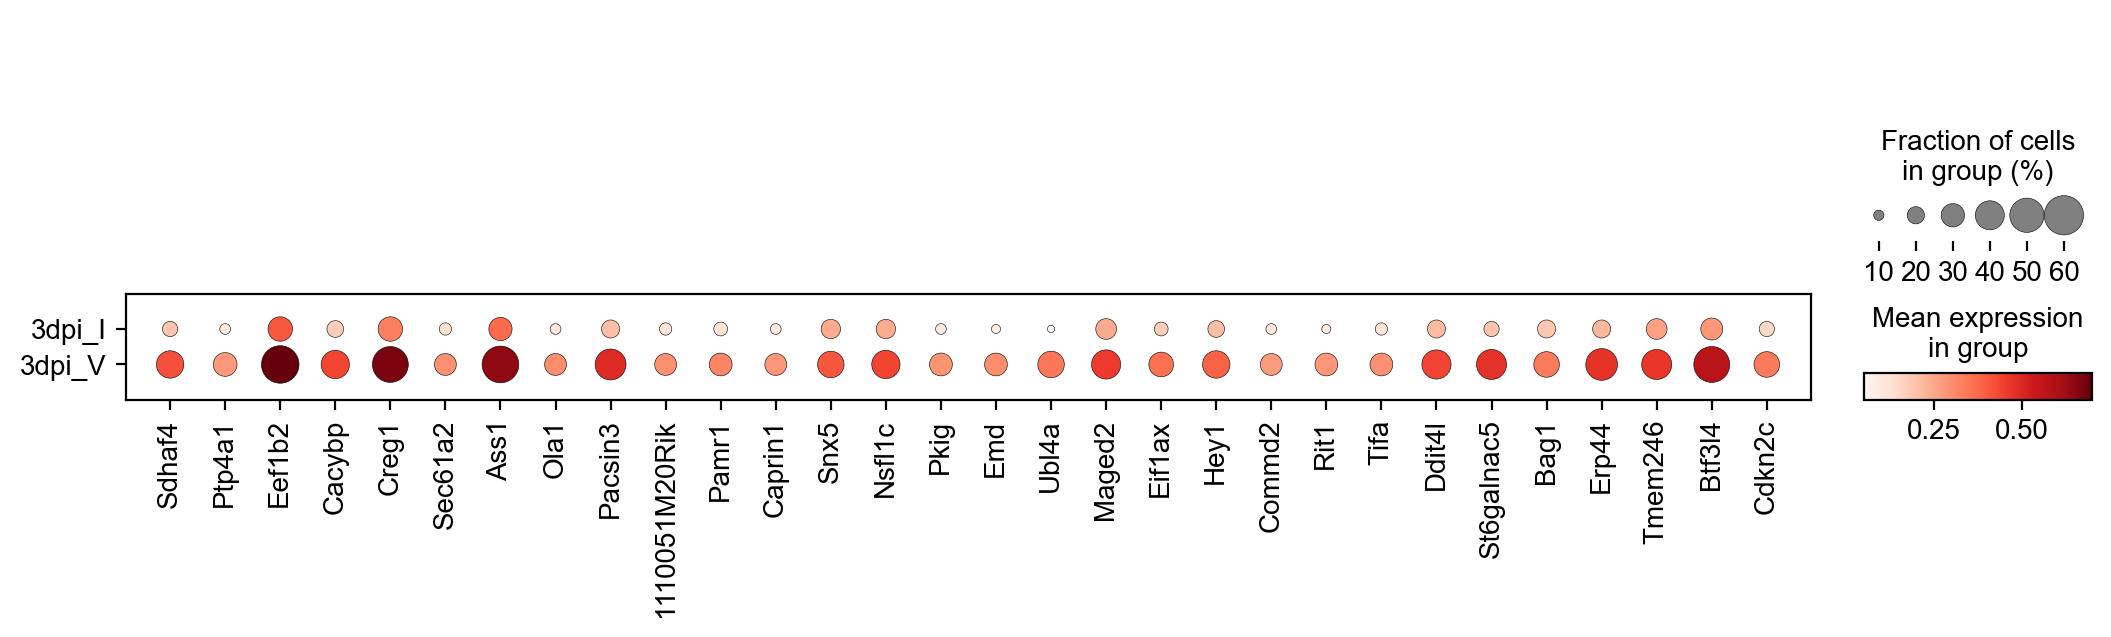

In [69]:
sc.pl.dotplot(adata_all_astros_3dpi_AG3,Astros_3dpi_Vehicle_AG3['gene'].head(30) , groupby='condition',)

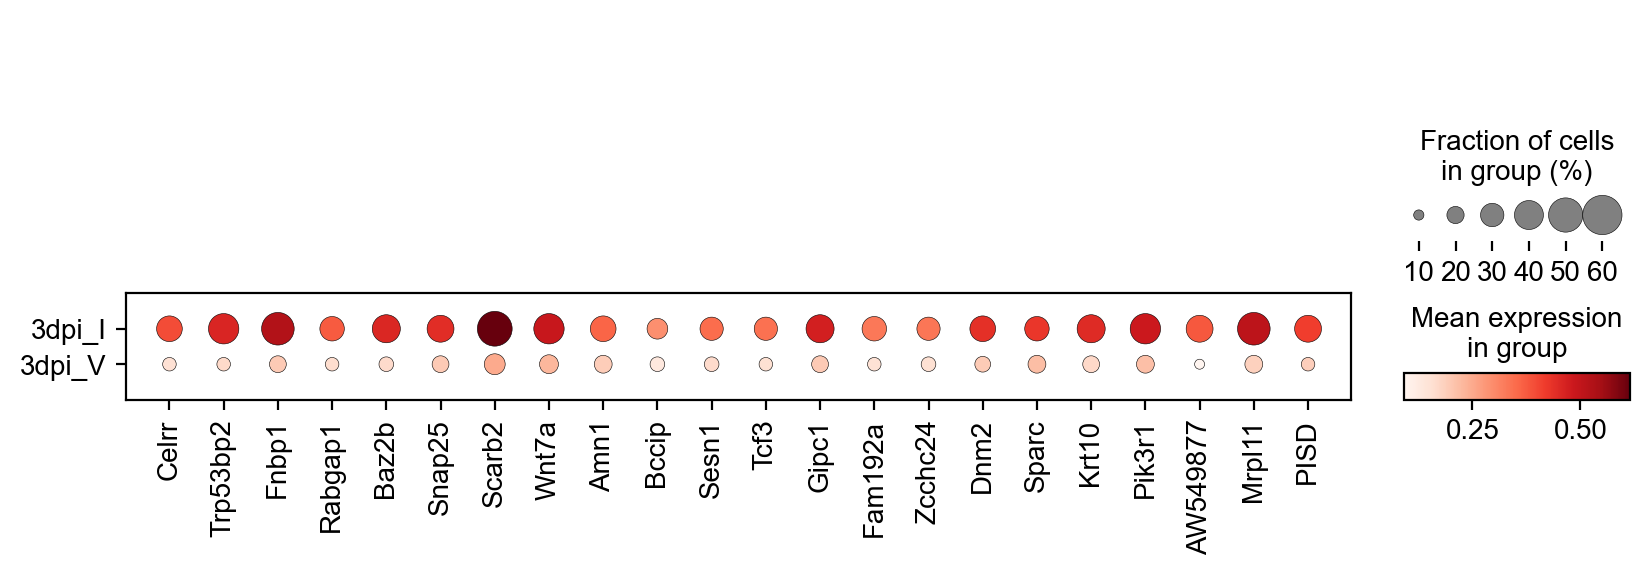

In [70]:
sc.pl.dotplot(adata_all_astros_3dpi_AG3,Astros_3dpi_Inhibitors_AG3['gene'].head(30) , groupby='condition',)

# Cluster AG4

In [71]:
difxpy_reactiveastros_3dpi_VvsI_AG4= de.test.wald(
    data=adata_all_astros_3dpi_AG4.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_astros_3dpi_AG4.var_names,
    sample_description=adata_all_astros_3dpi_AG4.obs
)

training location model: False
training scale model: True
iter   0: ll=21334138.774287
iter   1: ll=21334138.774287, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=1083842.710061, converged: 0.48% (loc: 0.48%, scale update: True), in 9.04sec
iter   3: ll=1083842.710061, converged: 0.48% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=1001225.201549, converged: 85.39% (loc: 85.39%, scale update: True), in 8.51sec
iter   5: ll=1001225.201549, converged: 85.39% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=990264.799401, converged: 96.57% (loc: 96.57%, scale update: True), in 4.67sec
iter   7: ll=990264.799401, converged: 96.57% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=989028.490390, converged: 99.38% (loc: 99.38%, scale update: True), in 4.07sec
iter   9: ll=989028.490390, converged: 99.38% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=988670.574842, converged: 99.81% (loc: 99.81%, scale update:

/opt/anaconda3/envs/sc-tutorial-020321/lib/python3.8/site-packages/dask/array/core.py:2894: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


Order test results by q-value:

In [72]:
difxpy_reactiveastros_3dpi_VvsI_AG3.summary().sort_values('qval', ascending=True).iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
987,Slc4a4,0.000084,0.157915,-0.654014,2.412844,False,6.442856e-09,-0.654014,0.166335,-211.884298
1370,Rlbp1,0.000101,0.157915,1.332451,0.715596,False,5.275902e-09,1.332451,0.342700,-118.982220
1108,Ndufa5,0.000341,0.279484,0.660506,1.825688,False,3.384388e-10,0.660506,0.184379,-188.554647
3090,Pgam1,0.000358,0.279484,0.588011,1.981651,False,1.934548e-09,0.588011,0.164731,-191.858021
526,Car2,0.001009,0.300734,0.517943,4.954128,False,3.274654e-08,0.517943,0.157523,-281.685300
1800,Adk,0.000973,0.300734,0.616831,1.990826,False,7.949285e-09,0.616831,0.187013,-198.524056
570,Rps3a1,0.001261,0.300734,0.529238,2.110092,False,6.202473e-09,0.529238,0.164124,-197.650639
2872,Gm42418,0.000896,0.300734,1.123906,1.577982,False,2.870329e-08,1.123906,0.338380,-173.494907
2833,Mtch1,0.000650,0.300734,1.035200,0.605505,False,1.206835e-09,1.035200,0.303605,-107.159243
797,Urod,0.001347,0.300734,1.281158,0.422018,False,2.188963e-09,1.281158,0.399637,-87.926739


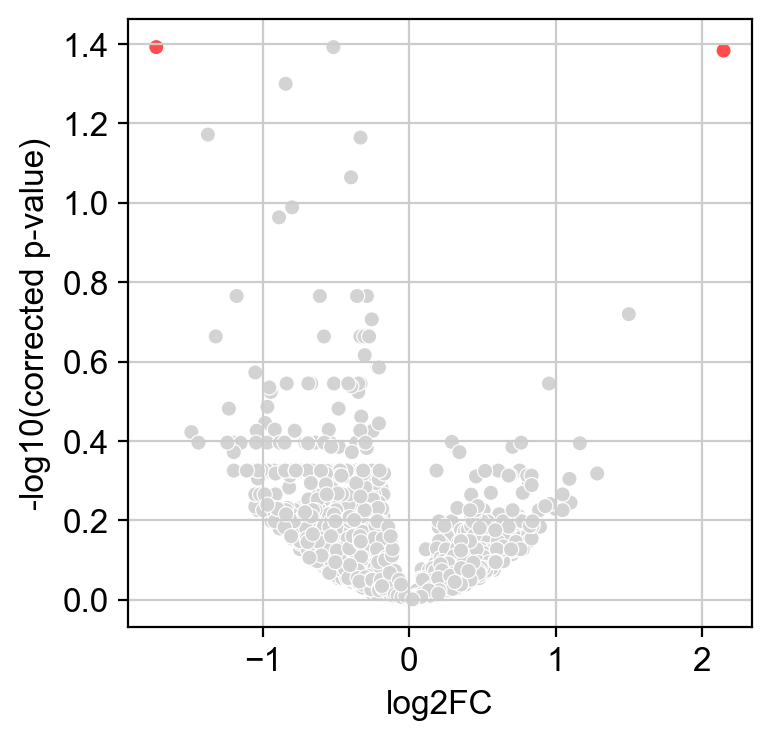

In [73]:
difxpy_reactiveastros_3dpi_VvsI_AG4.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [74]:
difxpy_reactiveastros_3dpi_VvsI_AG4.summary().to_csv(table_dir+today + 'difxpy_reactiveastros_3dpi_VvsI_AG4.csv')

In [75]:
difxpy_3dpi_VvsI_AG4 = pd.read_csv(table_dir + '220718difxpy_reactiveastros_3dpi_VvsI_AG4.csv', index_col=0)

In [76]:
difxpy_3dpi_VvsI_expressed_AG4=difxpy_3dpi_VvsI_AG4.loc[difxpy_3dpi_VvsI_AG4['mean']>0.2]

In [77]:
difxpy_3dpi_VvsI_expressed_AG4

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,Mrpl15,0.797825,0.983503,-0.052644,0.570175,False,3.341761e-09,-0.052644,0.205509,-233.813336
1,Lypla1,0.915276,0.993078,0.030738,0.210526,False,4.112638e-02,0.030738,0.288926,-0.966690
2,Tcea1,0.591427,0.965318,0.107699,0.438596,False,3.229048e-08,0.107699,0.200643,-196.371641
3,Rgs20,0.860791,0.987168,0.024915,1.131579,False,5.720292e-09,0.024915,0.142071,-325.391944
4,Atp6v1h,0.573269,0.965318,-0.113268,0.434211,False,2.640609e-03,-0.113268,0.201100,-193.816420
...,...,...,...,...,...,...,...,...,...,...
5673,mt-Nd4l,0.033945,0.629456,-0.376431,1.065789,False,1.802500e-09,-0.376431,0.177501,-323.827929
5674,mt-Nd4,0.320564,0.890325,-0.069982,22.767544,False,1.840779e-08,-0.069982,0.070454,-871.538116
5675,mt-Nd5,0.018407,0.549130,-0.333301,2.548246,False,2.345462e-08,-0.333301,0.141389,-476.726394
5676,mt-Cytb,0.377084,0.915068,-0.056419,41.824561,False,1.199896e-07,-0.056419,0.063874,-991.187700


In [78]:
difxpy_3dpi_VvsI_expressed_signif_AG4 = difxpy_3dpi_VvsI_expressed_AG4.loc[difxpy_3dpi_VvsI_expressed_AG4['pval']<0.05]

In [79]:
Astros_3dpi_Vehicle_AG4 = difxpy_3dpi_VvsI_expressed_signif_AG4.loc[difxpy_3dpi_VvsI_expressed_signif_AG4['log2fc']>0.7]
Astros_3dpi_Inhibitors_AG4 = difxpy_3dpi_VvsI_expressed_signif_AG4.loc[difxpy_3dpi_VvsI_expressed_signif_AG4['log2fc']<-0.7]

In [80]:
Astros_3dpi_Vehicle_AG4.shape

(11, 10)

In [81]:
Astros_3dpi_Inhibitors_AG4.shape

(28, 10)

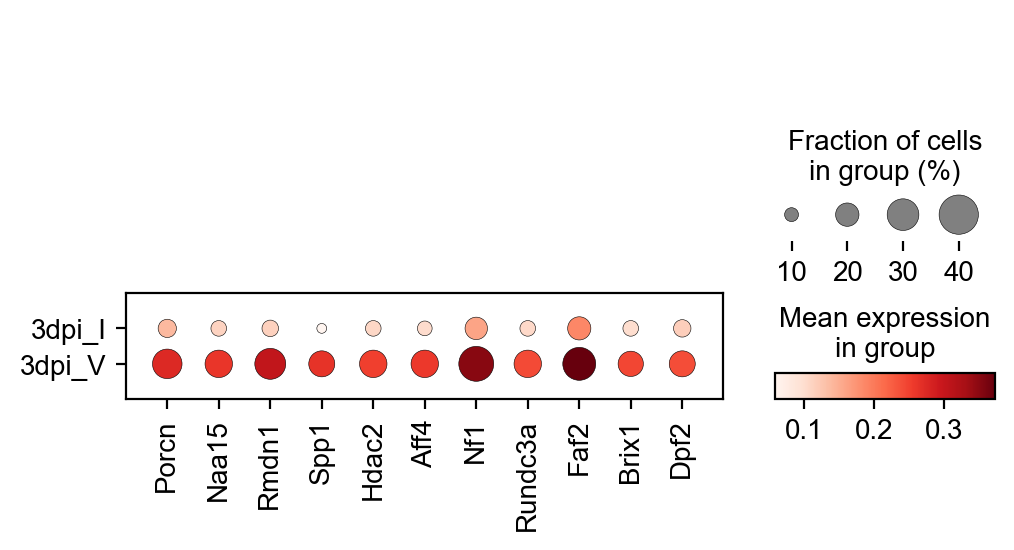

In [82]:
sc.pl.dotplot(adata_all_astros_3dpi_AG4,Astros_3dpi_Vehicle_AG4['gene'].head(30) , groupby='condition',)

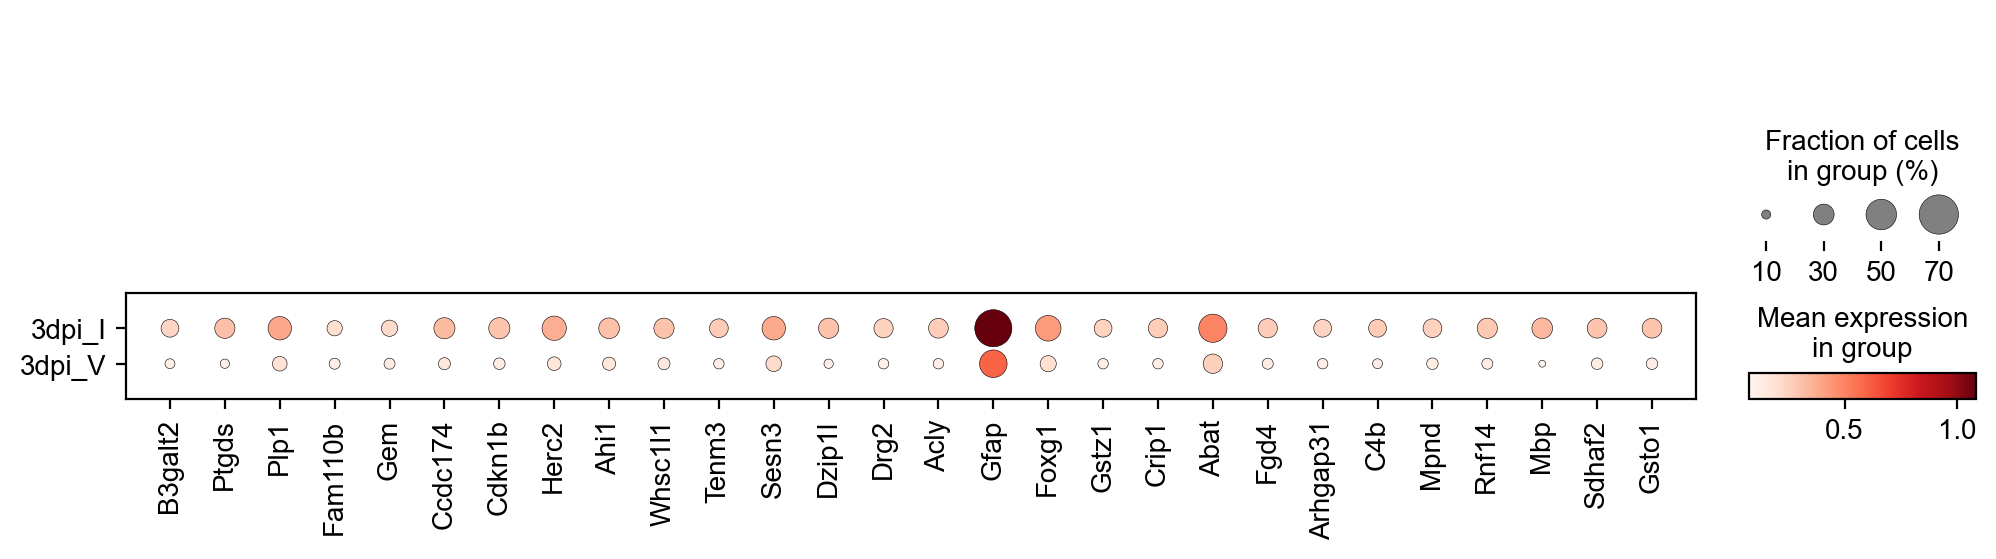

In [83]:
sc.pl.dotplot(adata_all_astros_3dpi_AG4,Astros_3dpi_Inhibitors_AG4['gene'].head(30) , groupby='condition',)

# Cluster AG5

In [84]:
difxpy_reactiveastros_3dpi_VvsI_AG5= de.test.wald(
    data=adata_all_astros_3dpi_AG5.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_astros_3dpi_AG5.var_names,
    sample_description=adata_all_astros_3dpi_AG5.obs
)

training location model: False
training scale model: True
iter   0: ll=21011863.415995
iter   1: ll=21011863.415995, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=2076574.675362, converged: 0.56% (loc: 0.56%, scale update: True), in 10.93sec
iter   3: ll=2076574.675362, converged: 0.56% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=1991442.161013, converged: 90.63% (loc: 90.63%, scale update: True), in 10.31sec
iter   5: ll=1991442.161013, converged: 90.63% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=1982470.902418, converged: 97.93% (loc: 97.93%, scale update: True), in 4.71sec
iter   7: ll=1982470.902418, converged: 97.93% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=1980054.757554, converged: 99.56% (loc: 99.56%, scale update: True), in 3.98sec
iter   9: ll=1980054.757554, converged: 99.56% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=1979768.737760, converged: 99.95% (loc: 99.95%, scale 

/opt/anaconda3/envs/sc-tutorial-020321/lib/python3.8/site-packages/dask/array/core.py:2894: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


Order test results by q-value:

In [85]:
difxpy_reactiveastros_3dpi_VvsI_AG3.summary().sort_values('qval', ascending=True).iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
987,Slc4a4,0.000084,0.157915,-0.654014,2.412844,False,6.442856e-09,-0.654014,0.166335,-211.884298
1370,Rlbp1,0.000101,0.157915,1.332451,0.715596,False,5.275902e-09,1.332451,0.342700,-118.982220
1108,Ndufa5,0.000341,0.279484,0.660506,1.825688,False,3.384388e-10,0.660506,0.184379,-188.554647
3090,Pgam1,0.000358,0.279484,0.588011,1.981651,False,1.934548e-09,0.588011,0.164731,-191.858021
526,Car2,0.001009,0.300734,0.517943,4.954128,False,3.274654e-08,0.517943,0.157523,-281.685300
1800,Adk,0.000973,0.300734,0.616831,1.990826,False,7.949285e-09,0.616831,0.187013,-198.524056
570,Rps3a1,0.001261,0.300734,0.529238,2.110092,False,6.202473e-09,0.529238,0.164124,-197.650639
2872,Gm42418,0.000896,0.300734,1.123906,1.577982,False,2.870329e-08,1.123906,0.338380,-173.494907
2833,Mtch1,0.000650,0.300734,1.035200,0.605505,False,1.206835e-09,1.035200,0.303605,-107.159243
797,Urod,0.001347,0.300734,1.281158,0.422018,False,2.188963e-09,1.281158,0.399637,-87.926739


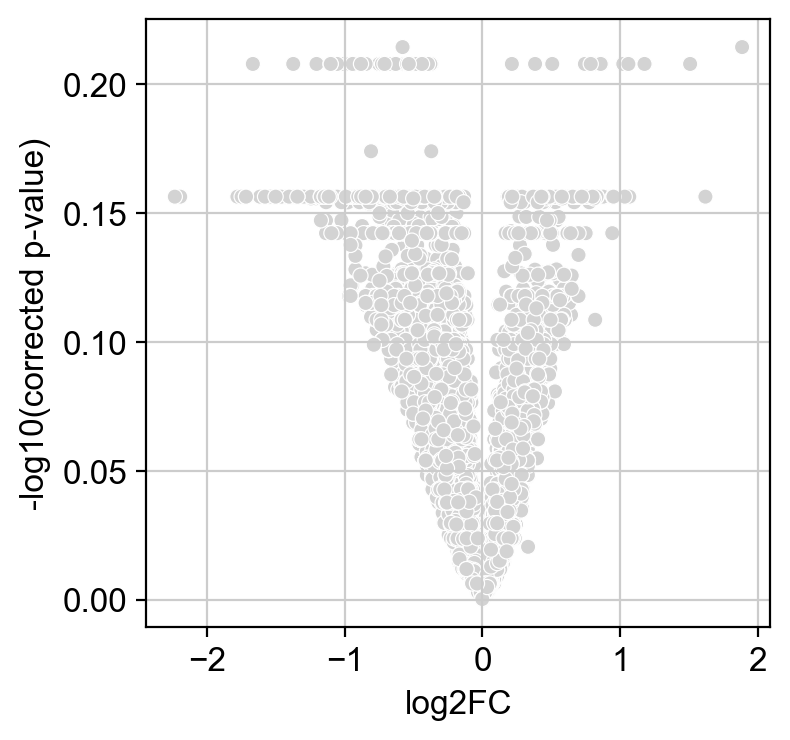

In [86]:
difxpy_reactiveastros_3dpi_VvsI_AG5.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [87]:
difxpy_reactiveastros_3dpi_VvsI_AG5.summary().to_csv(table_dir+today + 'difxpy_reactiveastros_3dpi_VvsI_AG5.csv')

In [88]:
difxpy_3dpi_VvsI_AG5 = pd.read_csv(table_dir + '220718difxpy_reactiveastros_3dpi_VvsI_AG5.csv', index_col=0)

In [89]:
difxpy_3dpi_VvsI_expressed_AG5=difxpy_3dpi_VvsI_AG5.loc[difxpy_3dpi_VvsI_AG5['mean']>0.2]

In [90]:
difxpy_3dpi_VvsI_expressed_AG5

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,Mrpl15,0.710779,0.960406,0.059463,0.867769,False,1.081310e-09,0.059463,0.160360,-300.960535
1,Lypla1,0.916376,0.990951,0.024372,0.537190,False,1.216067e-09,0.024372,0.232111,-240.227695
2,Tcea1,0.561055,0.931072,0.099492,0.814050,False,4.103764e-10,0.099492,0.171162,-294.455110
3,Rgs20,0.171575,0.786783,0.167979,2.326446,False,1.419030e-08,0.167979,0.122867,-473.466677
4,Atp6v1h,0.034548,0.697546,-0.420552,0.735537,False,2.235536e-10,-0.420552,0.198973,-277.273274
...,...,...,...,...,...,...,...,...,...,...
8160,mt-Nd6,0.099747,0.751927,-0.747806,0.227273,False,1.034902e-10,-0.747806,0.454294,-138.119587
8161,mt-Cytb,0.377714,0.877892,-0.055503,152.454545,False,2.067649e-07,-0.055503,0.062921,-1341.546548
8162,Vamp7,0.513684,0.916617,-0.176517,0.392562,False,2.201605e-09,-0.176517,0.270270,-199.832250
8163,PISD,0.903890,0.988649,0.033487,0.442149,False,2.223713e-09,0.033487,0.277333,-214.667426


In [91]:
difxpy_3dpi_VvsI_expressed_signif_AG5 = difxpy_3dpi_VvsI_expressed_AG5.loc[difxpy_3dpi_VvsI_expressed_AG5['pval']<0.05]

In [92]:
Astros_3dpi_Vehicle_AG5 = difxpy_3dpi_VvsI_expressed_signif_AG5.loc[difxpy_3dpi_VvsI_expressed_signif_AG5['log2fc']>0.7]
Astros_3dpi_Inhibitors_AG5 = difxpy_3dpi_VvsI_expressed_signif_AG5.loc[difxpy_3dpi_VvsI_expressed_signif_AG5['log2fc']<-0.7]

In [93]:
Astros_3dpi_Vehicle_AG5.shape

(21, 10)

In [94]:
Astros_3dpi_Inhibitors_AG5.shape

(94, 10)

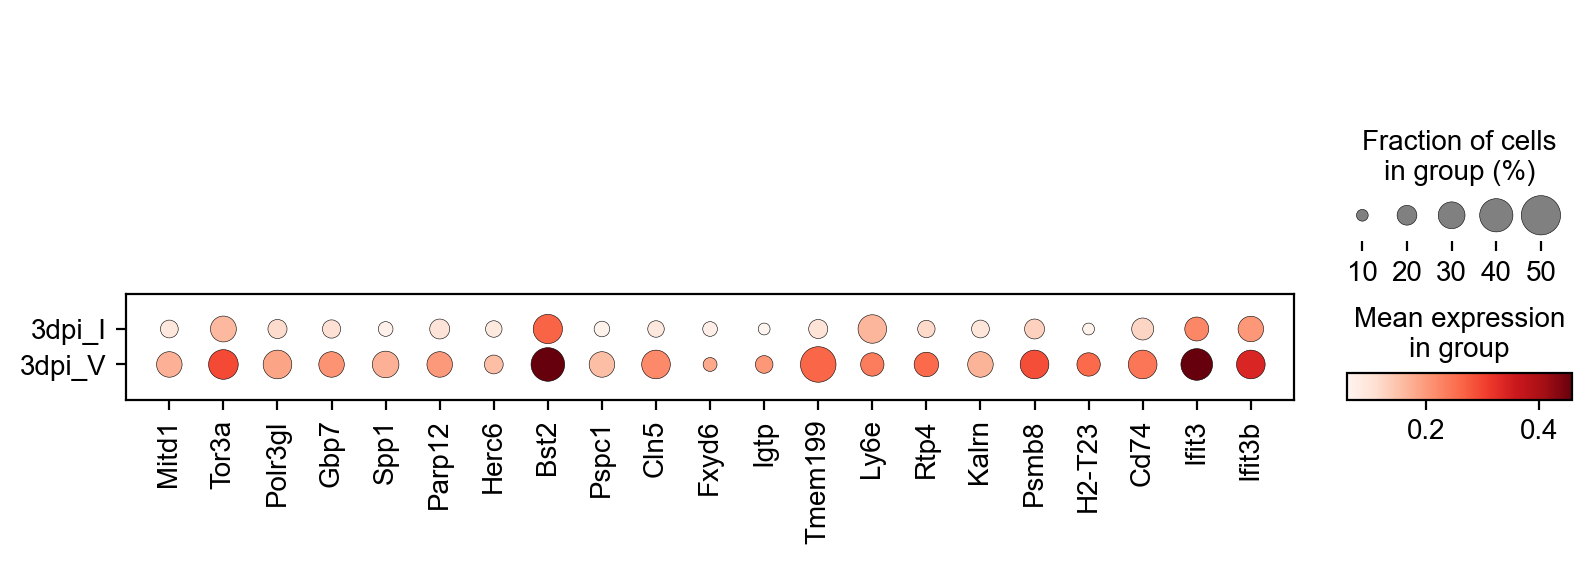

In [95]:
sc.pl.dotplot(adata_all_astros_3dpi_AG5,Astros_3dpi_Vehicle_AG5['gene'].head(30) , groupby='condition',)

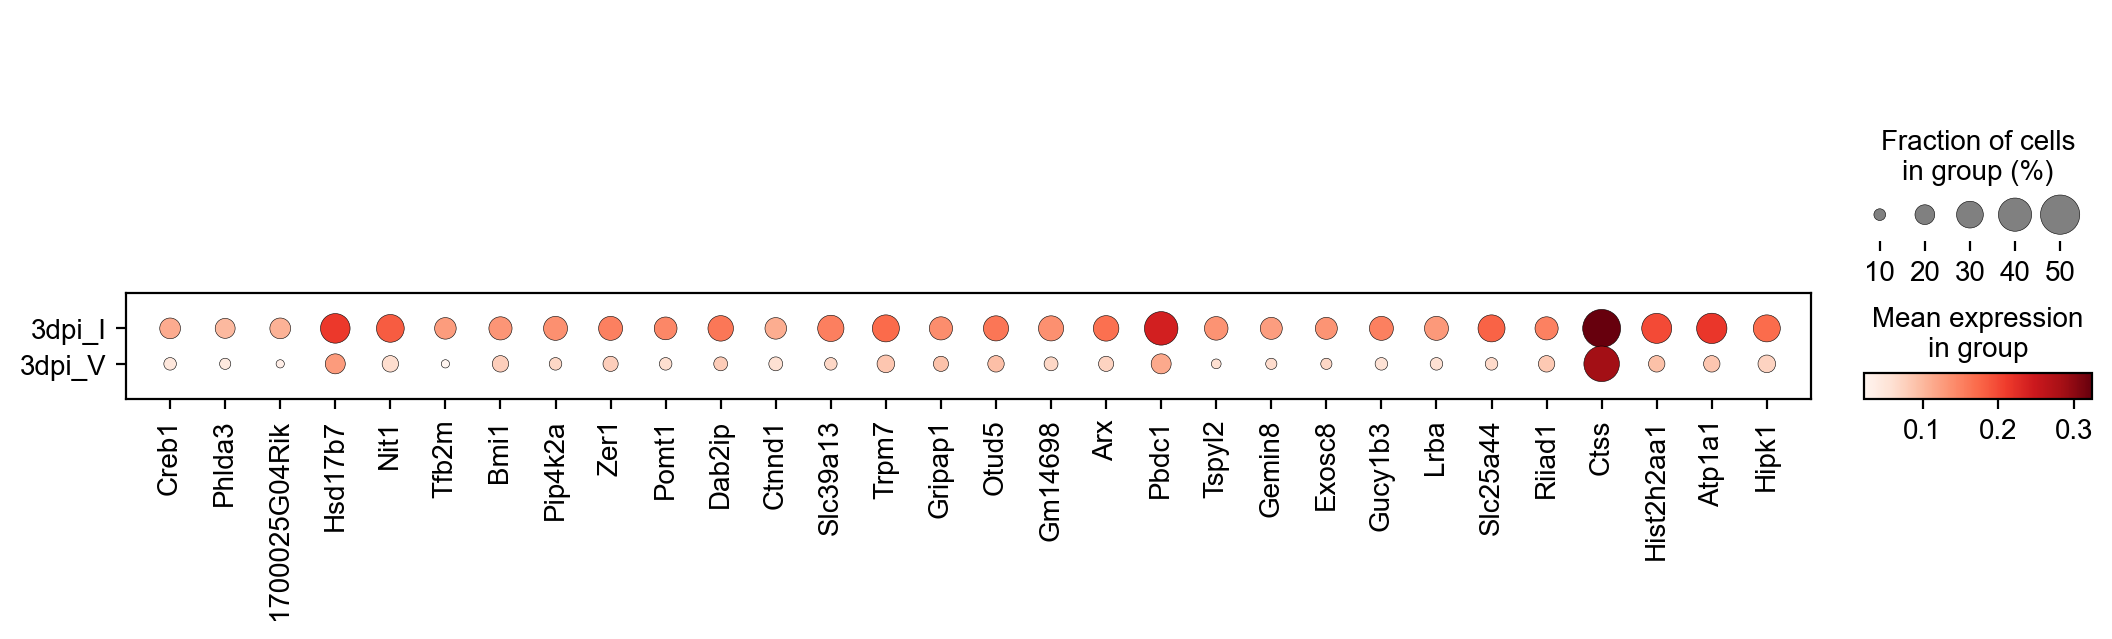

In [96]:
sc.pl.dotplot(adata_all_astros_3dpi_AG5,Astros_3dpi_Inhibitors_AG5['gene'].head(30) , groupby='condition',)

# Cluster AG6

In [97]:
difxpy_reactiveastros_3dpi_VvsI_AG6= de.test.wald(
    data=adata_all_astros_3dpi_AG6.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_astros_3dpi_AG6.var_names,
    sample_description=adata_all_astros_3dpi_AG6.obs
)

training location model: False
training scale model: True
iter   0: ll=4606613.141965
iter   1: ll=4606613.141965, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=1390444.400369, converged: 0.02% (loc: 0.02%, scale update: True), in 7.53sec
iter   3: ll=1390444.400369, converged: 0.02% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=1376955.037323, converged: 96.78% (loc: 96.78%, scale update: True), in 7.30sec
iter   5: ll=1376955.037323, converged: 96.78% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=1375192.472800, converged: 99.32% (loc: 99.32%, scale update: True), in 3.98sec
iter   7: ll=1375192.472800, converged: 99.32% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=1374439.593866, converged: 99.79% (loc: 99.79%, scale update: True), in 4.16sec
iter   9: ll=1374439.593866, converged: 99.79% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=1374370.947324, converged: 99.93% (loc: 99.93%, scale upda

/opt/anaconda3/envs/sc-tutorial-020321/lib/python3.8/site-packages/dask/array/core.py:2894: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


Order test results by q-value:

In [98]:
difxpy_reactiveastros_3dpi_VvsI_AG6.summary().sort_values('qval', ascending=True).iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
4229,Ifit3,1.081038e-08,0.000046,1.499806,0.935484,False,1.037809e-08,1.499806,0.262319,-375.698095
1232,Isg15,1.147506e-06,0.001641,1.795539,1.304985,False,4.691048e-08,1.795539,0.369111,-349.711686
1374,Oasl2,8.784811e-07,0.001641,2.170059,0.170088,False,1.090099e-09,2.170059,0.441332,-137.981889
3730,Rtp4,3.262531e-06,0.003498,1.422667,0.290323,False,1.171703e-08,1.422667,0.305716,-210.403178
4152,Malat1,1.146624e-05,0.008196,0.730725,9.788856,False,7.450224e-09,0.730725,0.166547,-1045.328183
4116,Mbp,1.064760e-05,0.008196,-1.229700,0.492669,False,1.166963e-08,-1.229700,0.279250,-292.181024
2383,Gm10073,2.536450e-05,0.015541,-1.859747,0.205279,False,1.824657e-10,-1.859747,0.441584,-168.977259
925,Gbp3,4.994964e-05,0.026395,1.262427,0.237537,False,1.289886e-08,1.262427,0.311260,-189.923170
4230,Ifit3b,5.538652e-05,0.026395,1.121222,0.542522,False,1.037675e-09,1.121222,0.278105,-298.171074
2986,Xaf1,8.243177e-05,0.035355,1.004649,0.337243,False,2.395793e-10,1.004649,0.255167,-244.113408


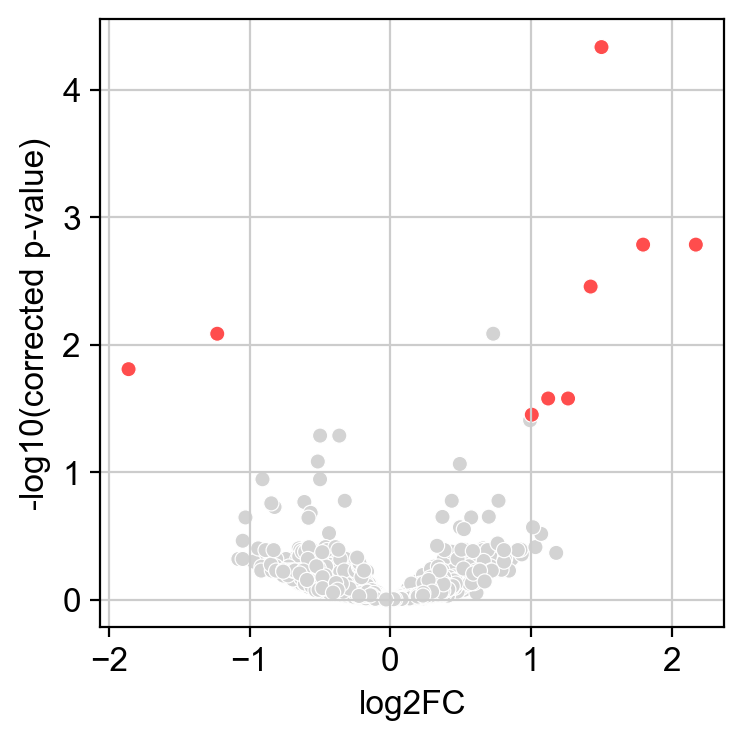

In [99]:
difxpy_reactiveastros_3dpi_VvsI_AG6.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [100]:
difxpy_reactiveastros_3dpi_VvsI_AG6.summary().to_csv(table_dir+today + 'difxpy_reactiveastros_3dpi_VvsI_AG6.csv')

In [101]:
difxpy_3dpi_VvsI_AG6 = pd.read_csv(table_dir + '220718difxpy_reactiveastros_3dpi_VvsI_AG6.csv', index_col=0)

In [102]:
difxpy_3dpi_VvsI_expressed_AG6=difxpy_3dpi_VvsI_AG6.loc[difxpy_3dpi_VvsI_AG6['mean']>0.2]

In [103]:
difxpy_3dpi_VvsI_expressed_AG6

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,Mrpl15,0.303294,0.904782,0.176416,0.656891,False,6.476466e-11,0.176416,0.171379,-378.880925
2,Tcea1,0.216963,0.875596,0.251956,0.343109,False,2.031833e-09,0.251956,0.204071,-259.058313
3,Rgs20,0.222236,0.875890,0.180292,0.897361,False,2.579363e-10,0.180292,0.147707,-445.642094
4,Atp6v1h,0.812130,0.985429,0.056065,0.272727,False,1.426491e-09,0.056065,0.235887,-225.468337
6,Rrs1,0.031698,0.590150,0.554542,0.217009,False,3.141521e-10,0.554542,0.258143,-192.242573
...,...,...,...,...,...,...,...,...,...,...
4282,mt-Nd3,0.052540,0.664936,-0.205031,3.023460,False,3.377029e-08,-0.205031,0.105758,-758.294031
4283,mt-Nd4l,0.006512,0.423184,-0.483503,0.844575,False,2.419332e-10,-0.483503,0.177705,-428.868570
4284,mt-Nd4,0.008214,0.466505,-0.235506,22.448680,False,1.994768e-09,-0.235506,0.089101,-1389.572308
4285,mt-Nd5,0.004619,0.404308,-0.369041,2.307918,False,1.301434e-10,-0.369041,0.130290,-687.274296


In [104]:
difxpy_3dpi_VvsI_expressed_signif_AG6 = difxpy_3dpi_VvsI_expressed_AG6.loc[difxpy_3dpi_VvsI_expressed_AG6['pval']<0.05]

In [105]:
Astros_3dpi_Vehicle_AG6 = difxpy_3dpi_VvsI_expressed_signif_AG6.loc[difxpy_3dpi_VvsI_expressed_signif_AG6['log2fc']>0.7]
Astros_3dpi_Inhibitors_AG6 = difxpy_3dpi_VvsI_expressed_signif_AG6.loc[difxpy_3dpi_VvsI_expressed_signif_AG6['log2fc']<-0.7]

In [106]:
Astros_3dpi_Vehicle_AG6.shape

(17, 10)

In [107]:
Astros_3dpi_Inhibitors_AG6.shape

(10, 10)

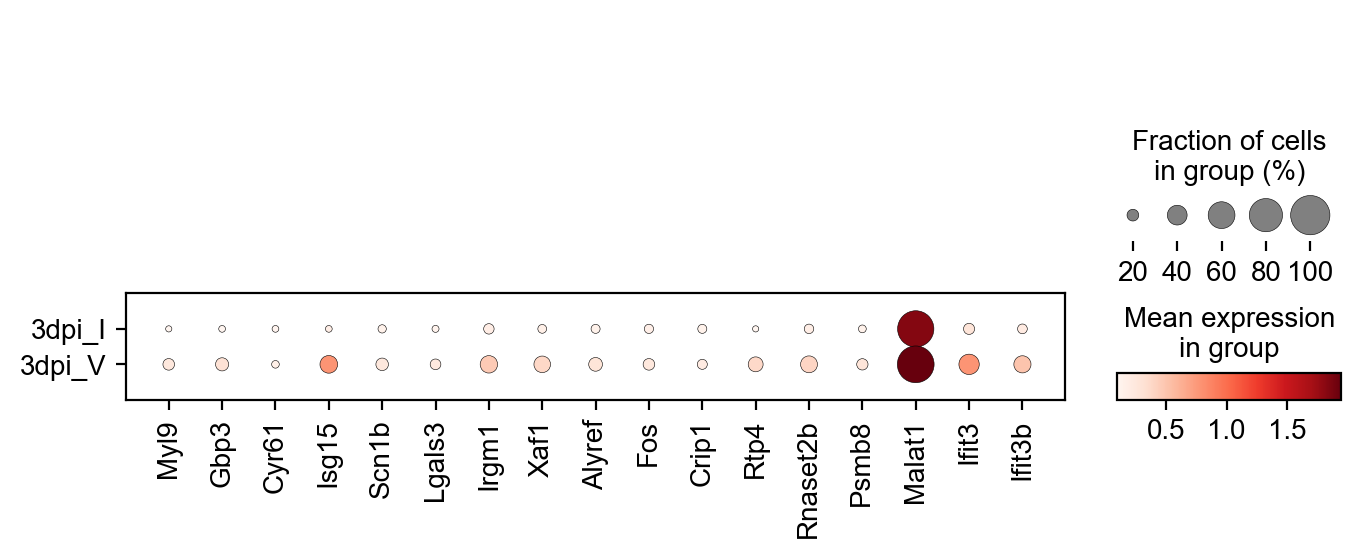

In [108]:
sc.pl.dotplot(adata_all_astros_3dpi_AG6,Astros_3dpi_Vehicle_AG6['gene'].head(30) , groupby='condition',)

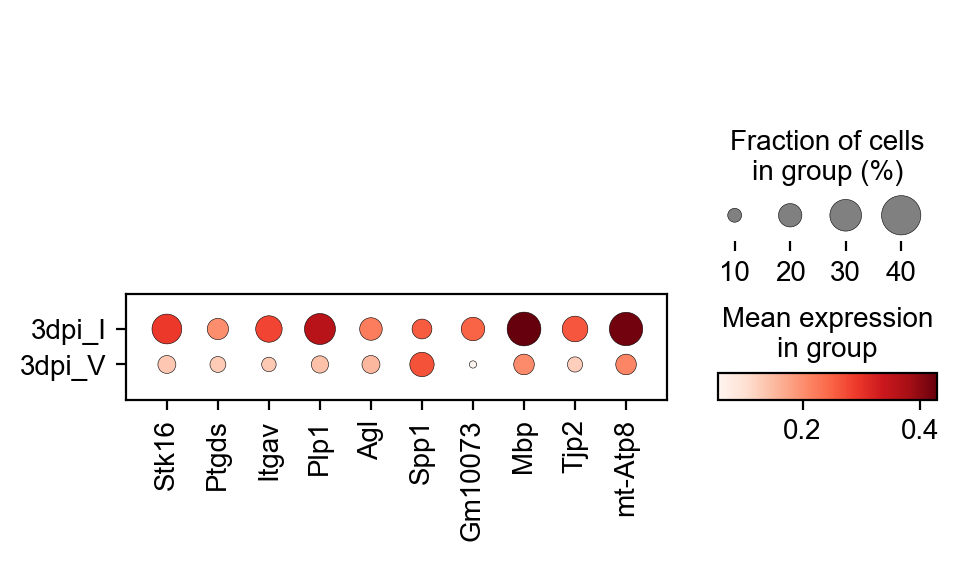

In [109]:
sc.pl.dotplot(adata_all_astros_3dpi_AG6,Astros_3dpi_Inhibitors_AG6['gene'].head(30) , groupby='condition',)

# Cluster AG7

In [110]:
difxpy_reactiveastros_3dpi_VvsI_AG7= de.test.wald(
    data=adata_all_astros_3dpi_AG7.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_astros_3dpi_AG7.var_names,
    sample_description=adata_all_astros_3dpi_AG7.obs
)

training location model: False
training scale model: True
iter   0: ll=20573108.040483
iter   1: ll=20573108.040483, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=2083569.929409, converged: 0.40% (loc: 0.40%, scale update: True), in 11.90sec
iter   3: ll=2083569.929409, converged: 0.40% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=2001494.757045, converged: 90.86% (loc: 90.86%, scale update: True), in 10.94sec
iter   5: ll=2001494.757045, converged: 90.86% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=1991183.599044, converged: 97.69% (loc: 97.69%, scale update: True), in 4.69sec
iter   7: ll=1991183.599044, converged: 97.69% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=1989150.197589, converged: 99.63% (loc: 99.63%, scale update: True), in 4.42sec
iter   9: ll=1989150.197589, converged: 99.63% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=1988860.014636, converged: 99.97% (loc: 99.97%, scale 

/opt/anaconda3/envs/sc-tutorial-020321/lib/python3.8/site-packages/dask/array/core.py:2894: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


Order test results by q-value:

In [111]:
difxpy_reactiveastros_3dpi_VvsI_AG3.summary().sort_values('qval', ascending=True).iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
987,Slc4a4,0.000084,0.157915,-0.654014,2.412844,False,6.442856e-09,-0.654014,0.166335,-211.884298
1370,Rlbp1,0.000101,0.157915,1.332451,0.715596,False,5.275902e-09,1.332451,0.342700,-118.982220
1108,Ndufa5,0.000341,0.279484,0.660506,1.825688,False,3.384388e-10,0.660506,0.184379,-188.554647
3090,Pgam1,0.000358,0.279484,0.588011,1.981651,False,1.934548e-09,0.588011,0.164731,-191.858021
526,Car2,0.001009,0.300734,0.517943,4.954128,False,3.274654e-08,0.517943,0.157523,-281.685300
1800,Adk,0.000973,0.300734,0.616831,1.990826,False,7.949285e-09,0.616831,0.187013,-198.524056
570,Rps3a1,0.001261,0.300734,0.529238,2.110092,False,6.202473e-09,0.529238,0.164124,-197.650639
2872,Gm42418,0.000896,0.300734,1.123906,1.577982,False,2.870329e-08,1.123906,0.338380,-173.494907
2833,Mtch1,0.000650,0.300734,1.035200,0.605505,False,1.206835e-09,1.035200,0.303605,-107.159243
797,Urod,0.001347,0.300734,1.281158,0.422018,False,2.188963e-09,1.281158,0.399637,-87.926739


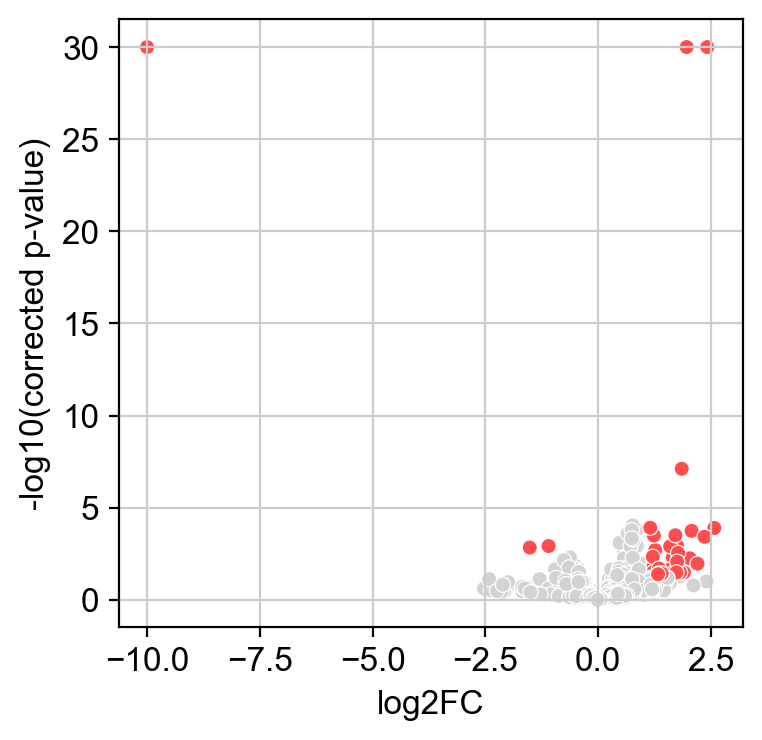

In [112]:
difxpy_reactiveastros_3dpi_VvsI_AG7.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [113]:
difxpy_reactiveastros_3dpi_VvsI_AG7.summary().to_csv(table_dir+today + 'difxpy_reactiveastros_3dpi_VvsI_AG7.csv')

In [114]:
difxpy_3dpi_VvsI_AG7 = pd.read_csv(table_dir + '220718difxpy_reactiveastros_3dpi_VvsI_AG7.csv', index_col=0)

In [115]:
difxpy_3dpi_VvsI_expressed_AG7=difxpy_3dpi_VvsI_AG7.loc[difxpy_3dpi_VvsI_AG7['mean']>0.2]

In [116]:
difxpy_3dpi_VvsI_expressed_AG7

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,Mrpl15,0.091194,0.512491,0.215259,2.648810,False,3.159043e-09,0.215259,0.127438,-339.471053
1,Lypla1,0.904170,0.982732,-0.025975,0.744048,False,5.126941e-09,-0.025975,0.215751,-196.407471
2,Tcea1,0.741017,0.944414,0.052402,1.428571,False,7.068666e-09,0.052402,0.158550,-265.152834
3,Rgs20,0.171889,0.623463,0.175157,4.017857,False,5.903442e-10,0.175157,0.128211,-403.177807
4,Atp6v1h,0.201313,0.658721,0.185572,1.732143,False,6.888022e-09,0.185572,0.145226,-286.961611
...,...,...,...,...,...,...,...,...,...,...
9779,mt-Nd6,0.374359,0.786892,0.410304,0.369048,False,9.314077e-09,0.410304,0.461878,-122.220738
9780,mt-Cytb,0.408571,0.801359,-0.077240,141.023810,False,7.711179e-08,-0.077240,0.093464,-954.145529
9781,Vamp7,0.798818,0.957212,0.055132,0.666667,False,1.234000e-09,0.055132,0.216309,-184.471831
9782,PISD,0.960820,0.991430,-0.012162,0.601190,False,3.759628e-09,-0.012162,0.247566,-177.092647


In [117]:
difxpy_3dpi_VvsI_expressed_signif_AG7 = difxpy_3dpi_VvsI_expressed_AG7.loc[difxpy_3dpi_VvsI_expressed_AG7['pval']<0.05]

In [118]:
Astros_3dpi_Vehicle_AG7 = difxpy_3dpi_VvsI_expressed_signif_AG7.loc[difxpy_3dpi_VvsI_expressed_signif_AG7['log2fc']>0.7]
Astros_3dpi_Inhibitors_AG7 = difxpy_3dpi_VvsI_expressed_signif_AG7.loc[difxpy_3dpi_VvsI_expressed_signif_AG7['log2fc']<-0.7]

In [119]:
Astros_3dpi_Vehicle_AG7.shape

(195, 10)

In [120]:
Astros_3dpi_Inhibitors_AG7.shape

(99, 10)

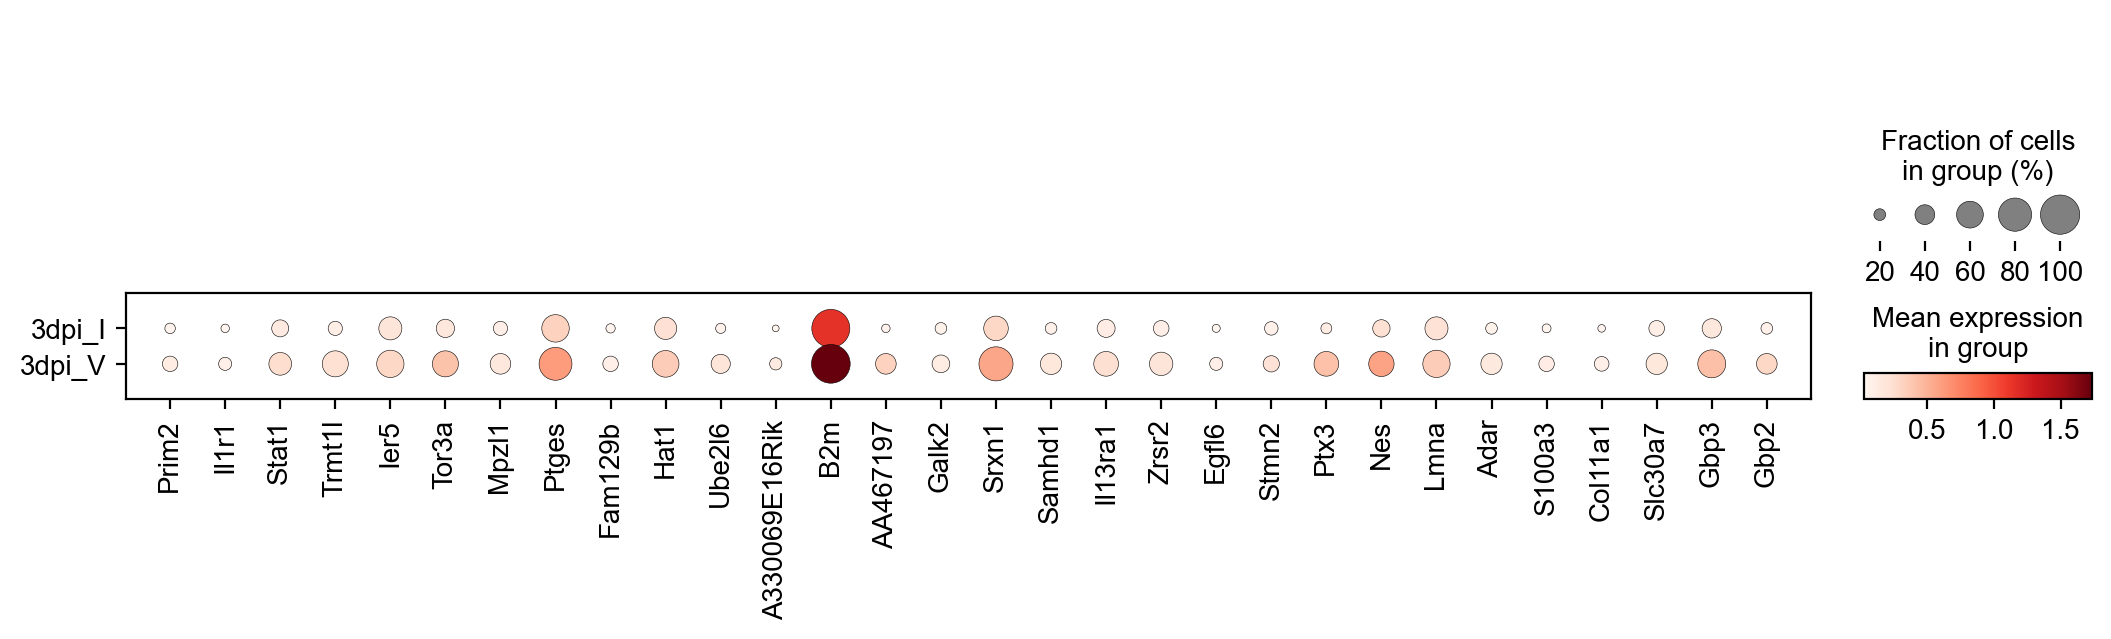

In [121]:
sc.pl.dotplot(adata_all_astros_3dpi_AG7,Astros_3dpi_Vehicle_AG7['gene'].head(30) , groupby='condition',)

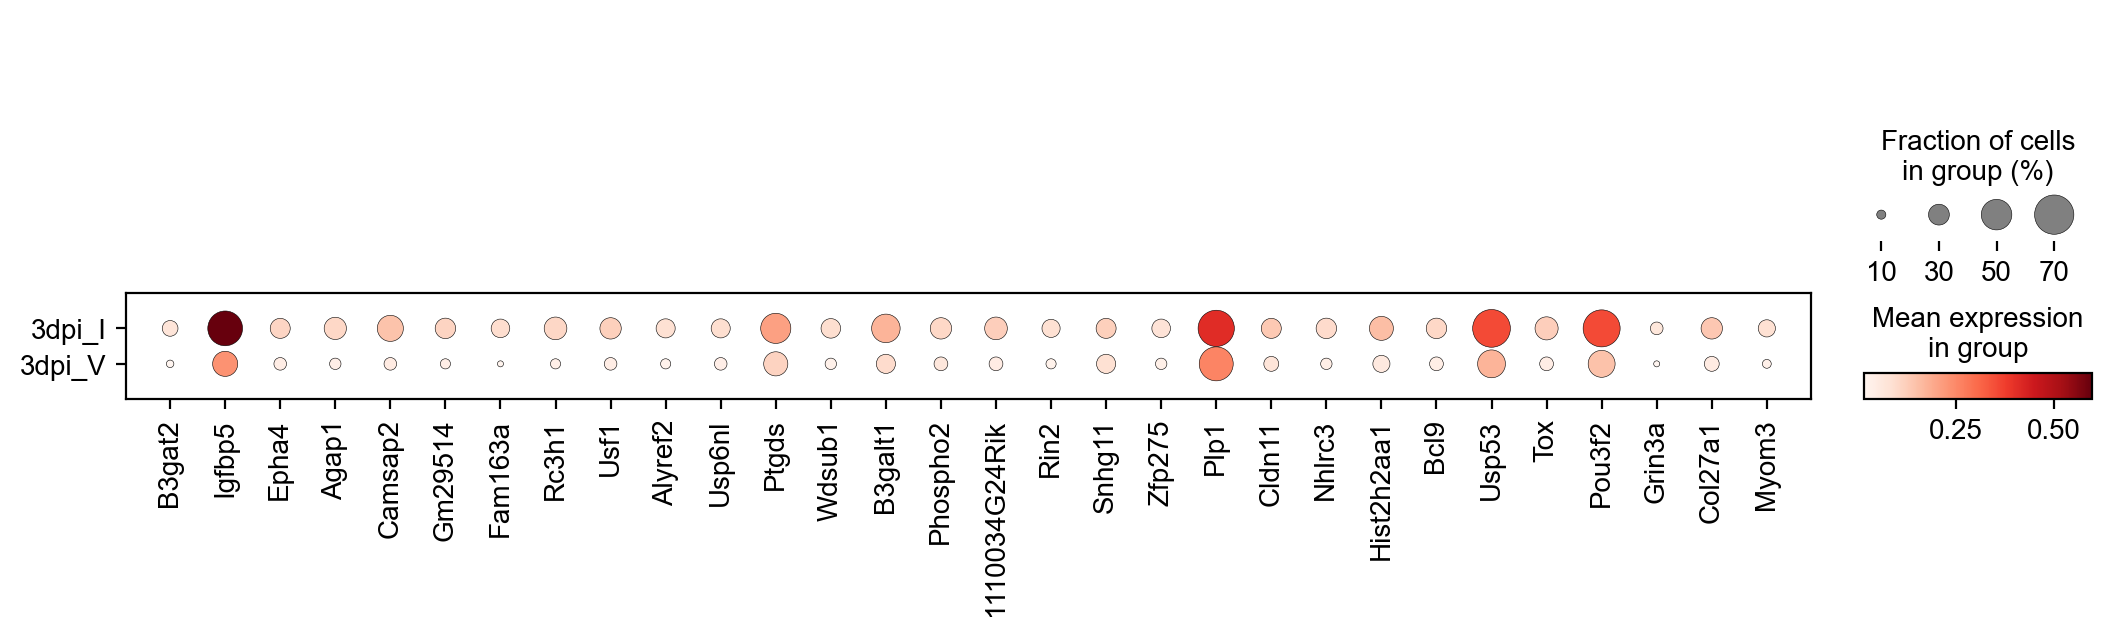

In [122]:
sc.pl.dotplot(adata_all_astros_3dpi_AG7,Astros_3dpi_Inhibitors_AG7['gene'].head(30) , groupby='condition',)

# Cluster AG8

In [123]:
difxpy_reactiveastros_3dpi_VvsI_AG8= de.test.wald(
    data=adata_all_astros_3dpi_AG8.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_astros_3dpi_AG8.var_names,
    sample_description=adata_all_astros_3dpi_AG8.obs
)

training location model: False
training scale model: True
iter   0: ll=5531004.646382
iter   1: ll=5531004.646382, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=390272.571095, converged: 0.00% (loc: 0.00%, scale update: True), in 7.98sec
iter   3: ll=390272.571095, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=353968.225260, converged: 87.04% (loc: 87.04%, scale update: True), in 7.93sec
iter   5: ll=353968.225260, converged: 87.04% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=350830.957868, converged: 96.91% (loc: 96.91%, scale update: True), in 4.34sec
iter   7: ll=350830.957868, converged: 96.91% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=350250.155288, converged: 99.44% (loc: 99.44%, scale update: True), in 4.01sec
iter   9: ll=350250.155288, converged: 99.44% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=350131.002333, converged: 99.90% (loc: 99.90%, scale update: True)

/opt/anaconda3/envs/sc-tutorial-020321/lib/python3.8/site-packages/dask/array/core.py:2894: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


Order test results by q-value:

In [124]:
difxpy_reactiveastros_3dpi_VvsI_AG3.summary().sort_values('qval', ascending=True).iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
987,Slc4a4,0.000084,0.157915,-0.654014,2.412844,False,6.442856e-09,-0.654014,0.166335,-211.884298
1370,Rlbp1,0.000101,0.157915,1.332451,0.715596,False,5.275902e-09,1.332451,0.342700,-118.982220
1108,Ndufa5,0.000341,0.279484,0.660506,1.825688,False,3.384388e-10,0.660506,0.184379,-188.554647
3090,Pgam1,0.000358,0.279484,0.588011,1.981651,False,1.934548e-09,0.588011,0.164731,-191.858021
526,Car2,0.001009,0.300734,0.517943,4.954128,False,3.274654e-08,0.517943,0.157523,-281.685300
1800,Adk,0.000973,0.300734,0.616831,1.990826,False,7.949285e-09,0.616831,0.187013,-198.524056
570,Rps3a1,0.001261,0.300734,0.529238,2.110092,False,6.202473e-09,0.529238,0.164124,-197.650639
2872,Gm42418,0.000896,0.300734,1.123906,1.577982,False,2.870329e-08,1.123906,0.338380,-173.494907
2833,Mtch1,0.000650,0.300734,1.035200,0.605505,False,1.206835e-09,1.035200,0.303605,-107.159243
797,Urod,0.001347,0.300734,1.281158,0.422018,False,2.188963e-09,1.281158,0.399637,-87.926739


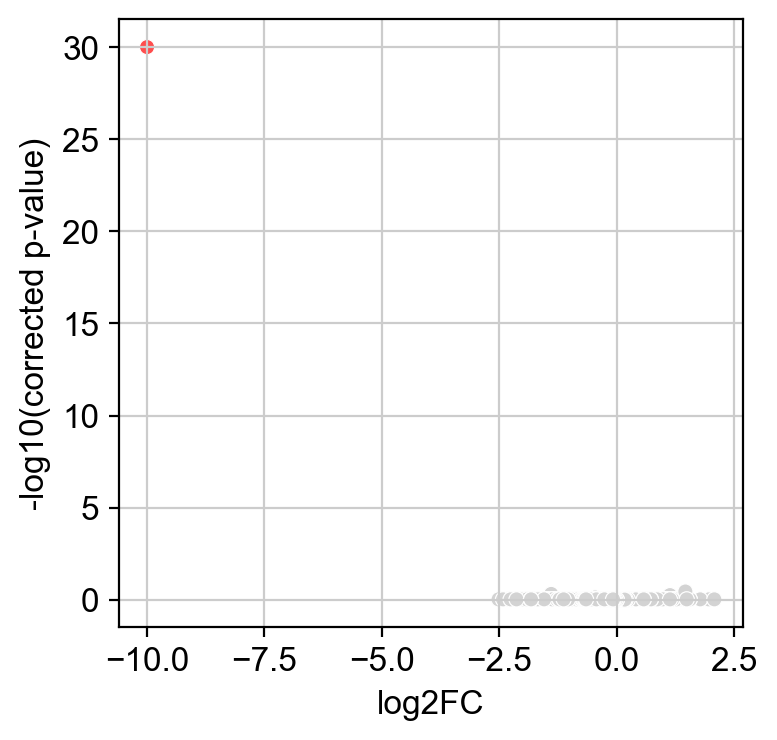

In [125]:
difxpy_reactiveastros_3dpi_VvsI_AG8.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [126]:
difxpy_reactiveastros_3dpi_VvsI_AG8.summary().to_csv(table_dir+today + 'difxpy_reactiveastros_3dpi_VvsI_AG8.csv')

In [127]:
difxpy_3dpi_VvsI_AG8 = pd.read_csv(table_dir + '220718difxpy_reactiveastros_3dpi_VvsI_AG8.csv', index_col=0)

In [128]:
difxpy_3dpi_VvsI_expressed_AG8=difxpy_3dpi_VvsI_AG8.loc[difxpy_3dpi_VvsI_AG8['mean']>0.2]

In [129]:
difxpy_3dpi_VvsI_expressed_AG8

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
3,Rgs20,0.060622,0.945172,-0.755870,0.67,False,3.344201e-09,-0.755870,0.402864,-109.365134
4,Atp6v1h,0.261345,0.945172,-0.648411,0.22,False,3.214875e-10,-0.648411,0.577280,-56.613767
5,Rb1cc1,0.068624,0.945172,-0.993252,0.29,False,1.003136e-10,-0.993252,0.545476,-66.713149
7,Rrs1,0.263226,0.945172,-0.577315,0.25,False,1.317039e-10,-0.577315,0.516013,-61.871636
8,Adhfe1,0.785616,0.974804,-0.117783,0.24,False,2.082538e-02,-0.117783,0.433013,-1.305749
...,...,...,...,...,...,...,...,...,...,...
5017,mt-Nd4l,0.030402,0.945172,-0.672094,1.21,False,1.041914e-10,-0.672094,0.310463,-149.590587
5018,mt-Nd4,0.557862,0.946875,-0.059083,37.46,False,2.765618e-09,-0.059083,0.100820,-423.983197
5019,mt-Nd5,0.171449,0.945172,-0.261883,3.31,False,1.997184e-08,-0.261883,0.191496,-228.051719
5020,mt-Cytb,0.427566,0.946875,-0.077324,67.03,False,2.716213e-08,-0.077324,0.097464,-478.942781


In [130]:
difxpy_3dpi_VvsI_expressed_signif_AG8 = difxpy_3dpi_VvsI_expressed_AG8.loc[difxpy_3dpi_VvsI_expressed_AG8['pval']<0.05]

In [131]:
Astros_3dpi_Vehicle_AG8 = difxpy_3dpi_VvsI_expressed_signif_AG8.loc[difxpy_3dpi_VvsI_expressed_signif_AG8['log2fc']>0.7]
Astros_3dpi_Inhibitors_AG8 = difxpy_3dpi_VvsI_expressed_signif_AG8.loc[difxpy_3dpi_VvsI_expressed_signif_AG8['log2fc']<-0.7]

In [132]:
Astros_3dpi_Vehicle_AG8.shape

(16, 10)

In [133]:
Astros_3dpi_Inhibitors_AG8.shape

(82, 10)

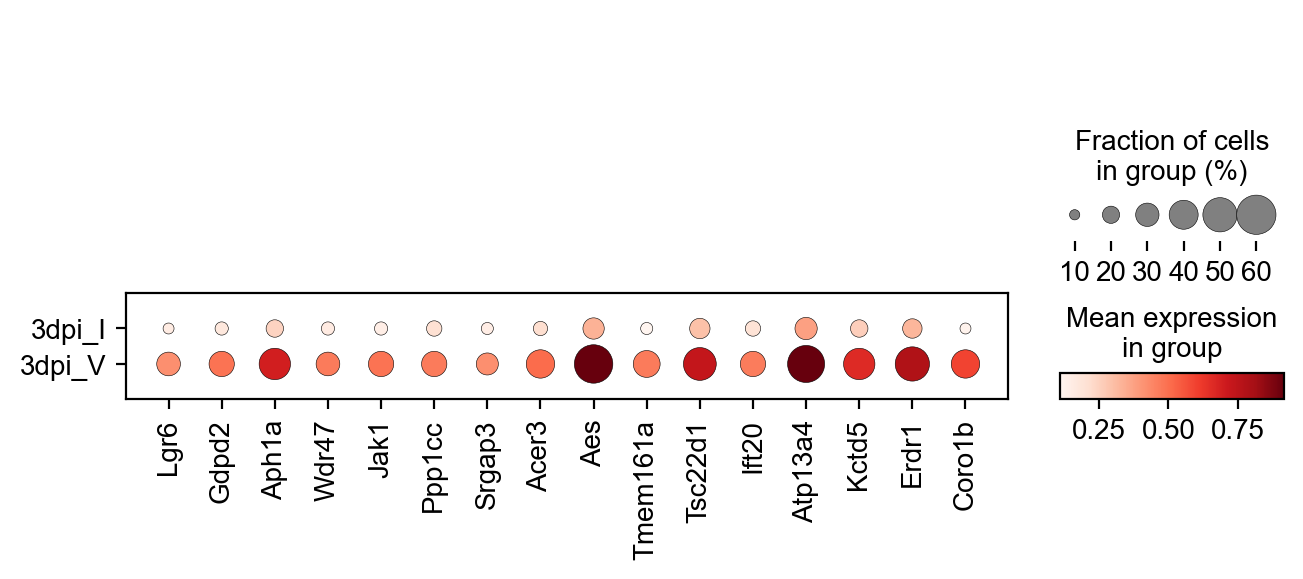

In [134]:
sc.pl.dotplot(adata_all_astros_3dpi_AG8,Astros_3dpi_Vehicle_AG8['gene'].head(30) , groupby='condition',)

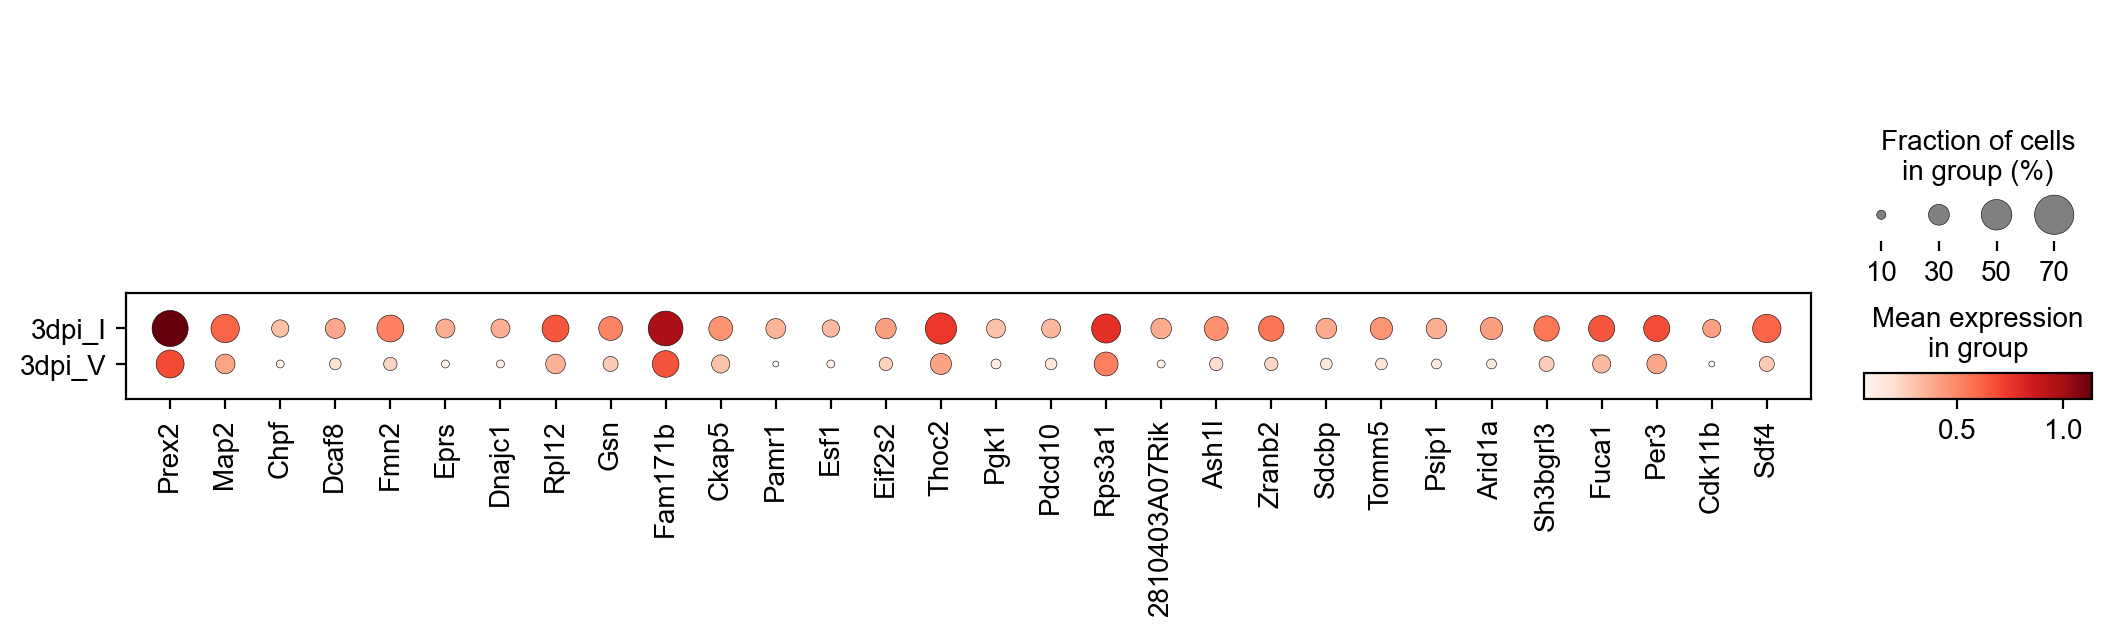

In [135]:
sc.pl.dotplot(adata_all_astros_3dpi_AG8,Astros_3dpi_Inhibitors_AG8['gene'].head(30) , groupby='condition',)

# Cluster AG9

In [136]:
difxpy_reactiveastros_3dpi_VvsI_AG9= de.test.wald(
    data=adata_all_astros_3dpi_AG9.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_astros_3dpi_AG9.var_names,
    sample_description=adata_all_astros_3dpi_AG9.obs
)

training location model: False
training scale model: True
iter   0: ll=3572889.373867
iter   1: ll=3572889.373867, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=1018889.558932, converged: 0.05% (loc: 0.05%, scale update: True), in 9.05sec
iter   3: ll=1018889.558932, converged: 0.05% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=1007025.851468, converged: 96.49% (loc: 96.49%, scale update: True), in 9.08sec
iter   5: ll=1007025.851468, converged: 96.49% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=1005222.084109, converged: 98.89% (loc: 98.89%, scale update: True), in 3.97sec
iter   7: ll=1005222.084109, converged: 98.89% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=1005080.057439, converged: 99.85% (loc: 99.85%, scale update: True), in 3.84sec
iter   9: ll=1005080.057439, converged: 99.85% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=1005004.563207, converged: 99.97% (loc: 99.97%, scale upda

/opt/anaconda3/envs/sc-tutorial-020321/lib/python3.8/site-packages/dask/array/core.py:2894: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


Order test results by q-value:

In [137]:
difxpy_reactiveastros_3dpi_VvsI_AG3.summary().sort_values('qval', ascending=True).iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
987,Slc4a4,0.000084,0.157915,-0.654014,2.412844,False,6.442856e-09,-0.654014,0.166335,-211.884298
1370,Rlbp1,0.000101,0.157915,1.332451,0.715596,False,5.275902e-09,1.332451,0.342700,-118.982220
1108,Ndufa5,0.000341,0.279484,0.660506,1.825688,False,3.384388e-10,0.660506,0.184379,-188.554647
3090,Pgam1,0.000358,0.279484,0.588011,1.981651,False,1.934548e-09,0.588011,0.164731,-191.858021
526,Car2,0.001009,0.300734,0.517943,4.954128,False,3.274654e-08,0.517943,0.157523,-281.685300
1800,Adk,0.000973,0.300734,0.616831,1.990826,False,7.949285e-09,0.616831,0.187013,-198.524056
570,Rps3a1,0.001261,0.300734,0.529238,2.110092,False,6.202473e-09,0.529238,0.164124,-197.650639
2872,Gm42418,0.000896,0.300734,1.123906,1.577982,False,2.870329e-08,1.123906,0.338380,-173.494907
2833,Mtch1,0.000650,0.300734,1.035200,0.605505,False,1.206835e-09,1.035200,0.303605,-107.159243
797,Urod,0.001347,0.300734,1.281158,0.422018,False,2.188963e-09,1.281158,0.399637,-87.926739


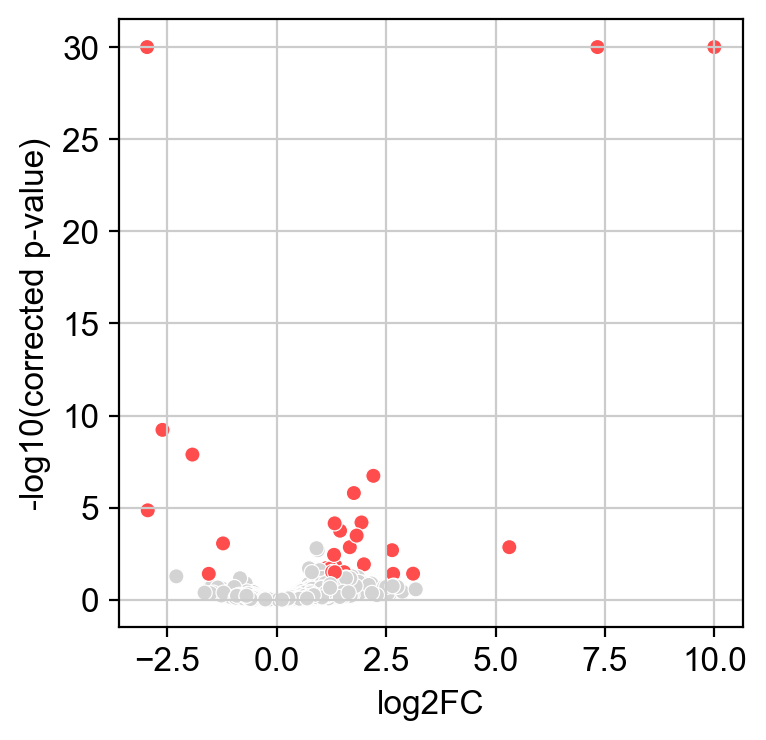

In [138]:
difxpy_reactiveastros_3dpi_VvsI_AG9.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [139]:
difxpy_reactiveastros_3dpi_VvsI_AG9.summary().to_csv(table_dir+today + 'difxpy_reactiveastros_3dpi_VvsI_AG9.csv')

In [140]:
difxpy_3dpi_VvsI_AG9 = pd.read_csv(table_dir + '220718difxpy_reactiveastros_3dpi_VvsI_AG9.csv', index_col=0)

In [141]:
difxpy_3dpi_VvsI_expressed_AG9=difxpy_3dpi_VvsI_AG9.loc[difxpy_3dpi_VvsI_AG9['mean']>0.2]

In [142]:
difxpy_3dpi_VvsI_expressed_AG9

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,Mrpl15,0.844663,0.993679,0.048588,1.101449,False,1.862467e-10,0.048588,0.247982,-200.538324
1,Lypla1,0.448922,0.952303,0.299190,0.253623,False,8.955778e-10,0.299190,0.395120,-86.830146
2,Tcea1,0.760750,0.984917,0.072759,0.971014,False,4.818028e-09,0.072759,0.238950,-188.352645
3,Rgs20,0.122775,0.801396,0.451750,1.007246,False,2.673105e-09,0.451750,0.292731,-188.001515
4,Atp6v1h,0.974558,0.997706,-0.008065,1.449275,False,4.807275e-09,-0.008065,0.252873,-227.132249
...,...,...,...,...,...,...,...,...,...,...
7396,mt-Nd4,0.487780,0.953420,0.116878,16.355072,False,1.312462e-08,0.116878,0.168450,-527.112397
7397,mt-Nd5,0.156676,0.833567,0.264962,2.376812,False,1.211255e-10,0.264962,0.187075,-281.102473
7398,mt-Cytb,0.829985,0.993264,0.035550,25.065217,False,2.550049e-09,0.035550,0.165565,-584.659905
7399,Vamp7,0.448246,0.952303,-0.264387,0.333333,False,2.034429e-10,-0.264387,0.348638,-103.144276


In [143]:
difxpy_3dpi_VvsI_expressed_signif_AG9 = difxpy_3dpi_VvsI_expressed_AG9.loc[difxpy_3dpi_VvsI_expressed_AG9['pval']<0.05]

In [144]:
Astros_3dpi_Vehicle_AG9 = difxpy_3dpi_VvsI_expressed_signif_AG9.loc[difxpy_3dpi_VvsI_expressed_signif_AG9['log2fc']>0.7]
Astros_3dpi_Inhibitors_AG9 = difxpy_3dpi_VvsI_expressed_signif_AG9.loc[difxpy_3dpi_VvsI_expressed_signif_AG9['log2fc']<-0.7]

In [145]:
Astros_3dpi_Vehicle_AG9.shape

(278, 10)

In [146]:
Astros_3dpi_Inhibitors_AG9.shape

(49, 10)

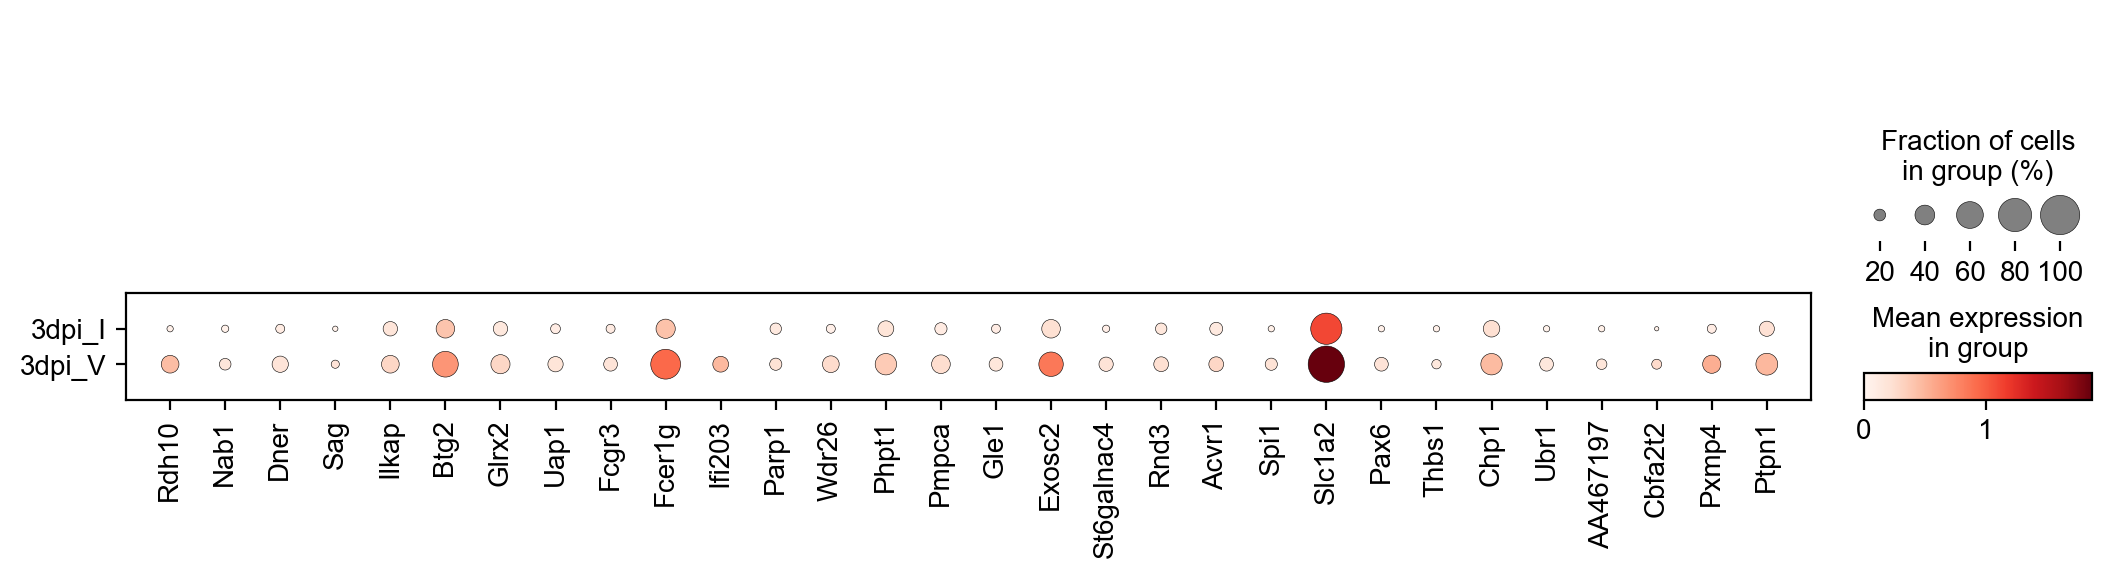

In [147]:
sc.pl.dotplot(adata_all_astros_3dpi_AG9,Astros_3dpi_Vehicle_AG9['gene'].head(30) , groupby='condition',)

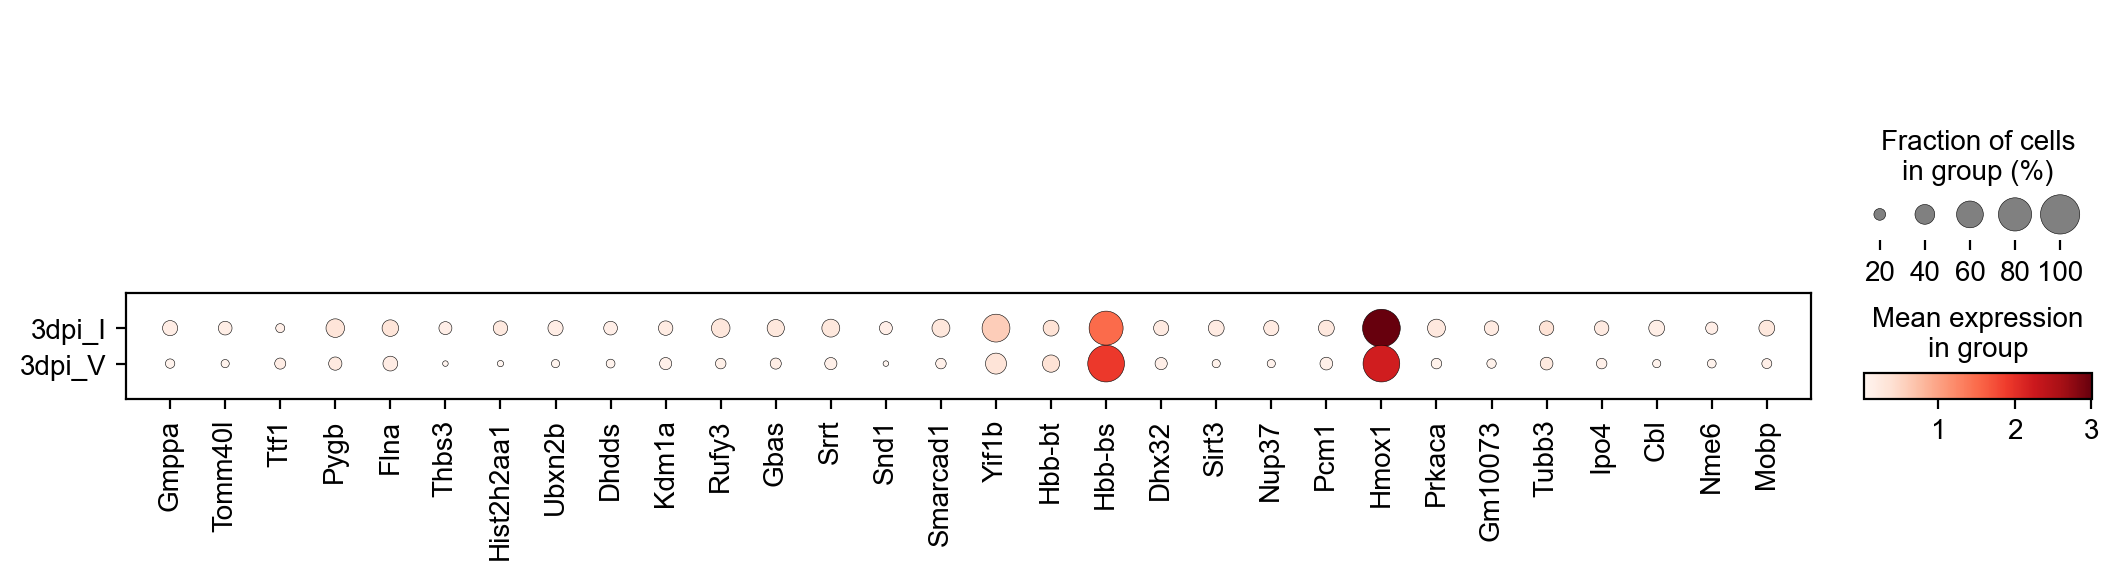

In [148]:
sc.pl.dotplot(adata_all_astros_3dpi_AG9,Astros_3dpi_Inhibitors_AG9['gene'].head(30) , groupby='condition',)